In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as smp
import statsmodels.stats.weightstats as stm
import statsmodels.api as sm
import math
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind,pearsonr,chi2_contingency
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore



In [18]:
#1.##########question：#############
#Do bats perceive rats not just as competitors for food but also as potential predators?
#If rats are considered a predation risk by bats, scientists believe that this perception will translate into the bats’ higher level of
#avoidance behaviour or increased vigilance during foraging on the food platform

print('\n--- 1. prepare the data ---')

## step 1.2: load both datasets
print('loading datasets...')
df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')
print(f'dataset1 shape: {df1.shape}')
print(f'dataset2 shape: {df2.shape}')

# step 1.3: dataset1 overview

print(df1.head())
print(df1.columns.tolist())
print(df1.info())
print(df1.isnull().sum())
print(df1.dtypes)
print(df1.describe())


# step 1.4: important variables in dataset1

print("bat_landing_to_food statistics:")
print(f"mean: {df1['bat_landing_to_food'].mean():.2f}s")
print(f"min: {df1['bat_landing_to_food'].min():.2f}s")
print(f"max: {df1['bat_landing_to_food'].max():.2f}s")
print(f"missing: {df1['bat_landing_to_food'].isnull().sum()}")

# check risk behavior variable
print('\nrisk value counts:')
print(df1['risk'].value_counts(dropna=False))

# check reward variable
print('\nreward value counts:')
print(df1['reward'].value_counts(dropna=False))

# check time variables
print('\nseconds_after_rat_arrival mean, missing:')
print(f"mean: {df1['seconds_after_rat_arrival'].mean():.2f}")
print(f"missing: {df1['seconds_after_rat_arrival'].isnull().sum()}")

# step 1.5:dataset2 overview
print(df2.head())
print(df2.columns.tolist())
print(df2.isnull().sum())
print(df2.describe())


# step 1.6: check specific variables in dataset2
print("\n--- checking key variables in dataset2 ---")

# check rat activity variables
print('\nrat_minutes mean, max:')
print(f"mean: {df2['rat_minutes'].mean():.2f} minutes")
print(f"max: {df2['rat_minutes'].max():.2f} minutes")

print(f"mean: {df2['rat_arrival_number'].mean():.2f} arrivals")
print(f"max: {df2['rat_arrival_number'].max():.2f} arrivals")

print(f"mean: {df2['bat_landing_number'].mean():.2f} landings")
print(f"max: {df2['bat_landing_number'].max():.2f} landings")

# check food availability
print('food_availability mean, missing:')
print(f"mean: {df2['food_availability'].mean():.2f}")
print(f"missing: {df2['food_availability'].isnull().sum()}")


# step 1.7: check for data format issues
print("\n--- checking for data format issues ---")
print("time format check for dataset1:")

print(f"start_time sample: {df1['start_time'].iloc[0] if 'start_time' in df1.columns else 'column not found'}")
print(f"rat_period_start sample: {df1['rat_period_start'].iloc[0] if 'rat_period_start' in df1.columns else 'column not found'}")

print("\ntime format check for dataset2:")
print(f"time sample: {df2['time'].iloc[0] if 'time' in df2.columns else 'column not found'}")

# check categorical variable encoding
print("\ncategorical variable check:")
if 'season' in df1.columns:
    print(f"season values: {df1['season'].unique()}")
if 'month' in df1.columns:
    print(f"month values: {df1['month'].unique()}")


# step 1.8: check for outliers and data consistency
print("\n--- outlier detection ---")

#data format checks
negative_time = df1[df1['bat_landing_to_food'] < 0]
print(f"negative hesitation time records: {len(negative_time)}")

negative_seconds = df1[df1['seconds_after_rat_arrival'] < 0]
print(f"negative seconds_after_rat_arrival records: {len(negative_seconds)}")

high_hesitation = df1[df1['bat_landing_to_food'] > 300]  # more than 5 minutes
print(f"extremely high hesitation time records (>300s): {len(high_hesitation)}")



# step 1.9: initial data cleaning decisions
print("\n--- initial data cleaning plan ---")

# decide how to handle missing values in target variable
target_missing = df1['bat_landing_to_food'].isnull().sum()
print(f"target variable missing: {target_missing} - will remove these rows")

# check if we have enough data for seasonal analysis
if 'season' in df1.columns:
    seasonal_counts = df1['season'].value_counts()
    print(f"\nseasonal distribution:")
    print(seasonal_counts)



df1['z'] = zscore(df1['bat_landing_to_food'])
df1 = df1[np.abs(df1['z']) < 3]

print("outliers removed based on z-score (|z| < 3).")
print("remaining samples:", len(df1))
print("this helps reduce noise in the response variable and improve model fit.")



--- 1. prepare the data ---
loading datasets...
dataset1 shape: (907, 12)
dataset2 shape: (2123, 7)
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017


--- comprehensive data visualization with alternative color schemes ---


/tmp/ipython-input-2517329420.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='risk', ax=axes[0,2], palette=['#2ca02c', '#d62728'])
/tmp/ipython-input-2517329420.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='reward', ax=axes[1,0], palette=['#e377c2', '#17becf'])
/tmp/ipython-input-2517329420.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='season', ax=axes[1,2], palette='viridis')


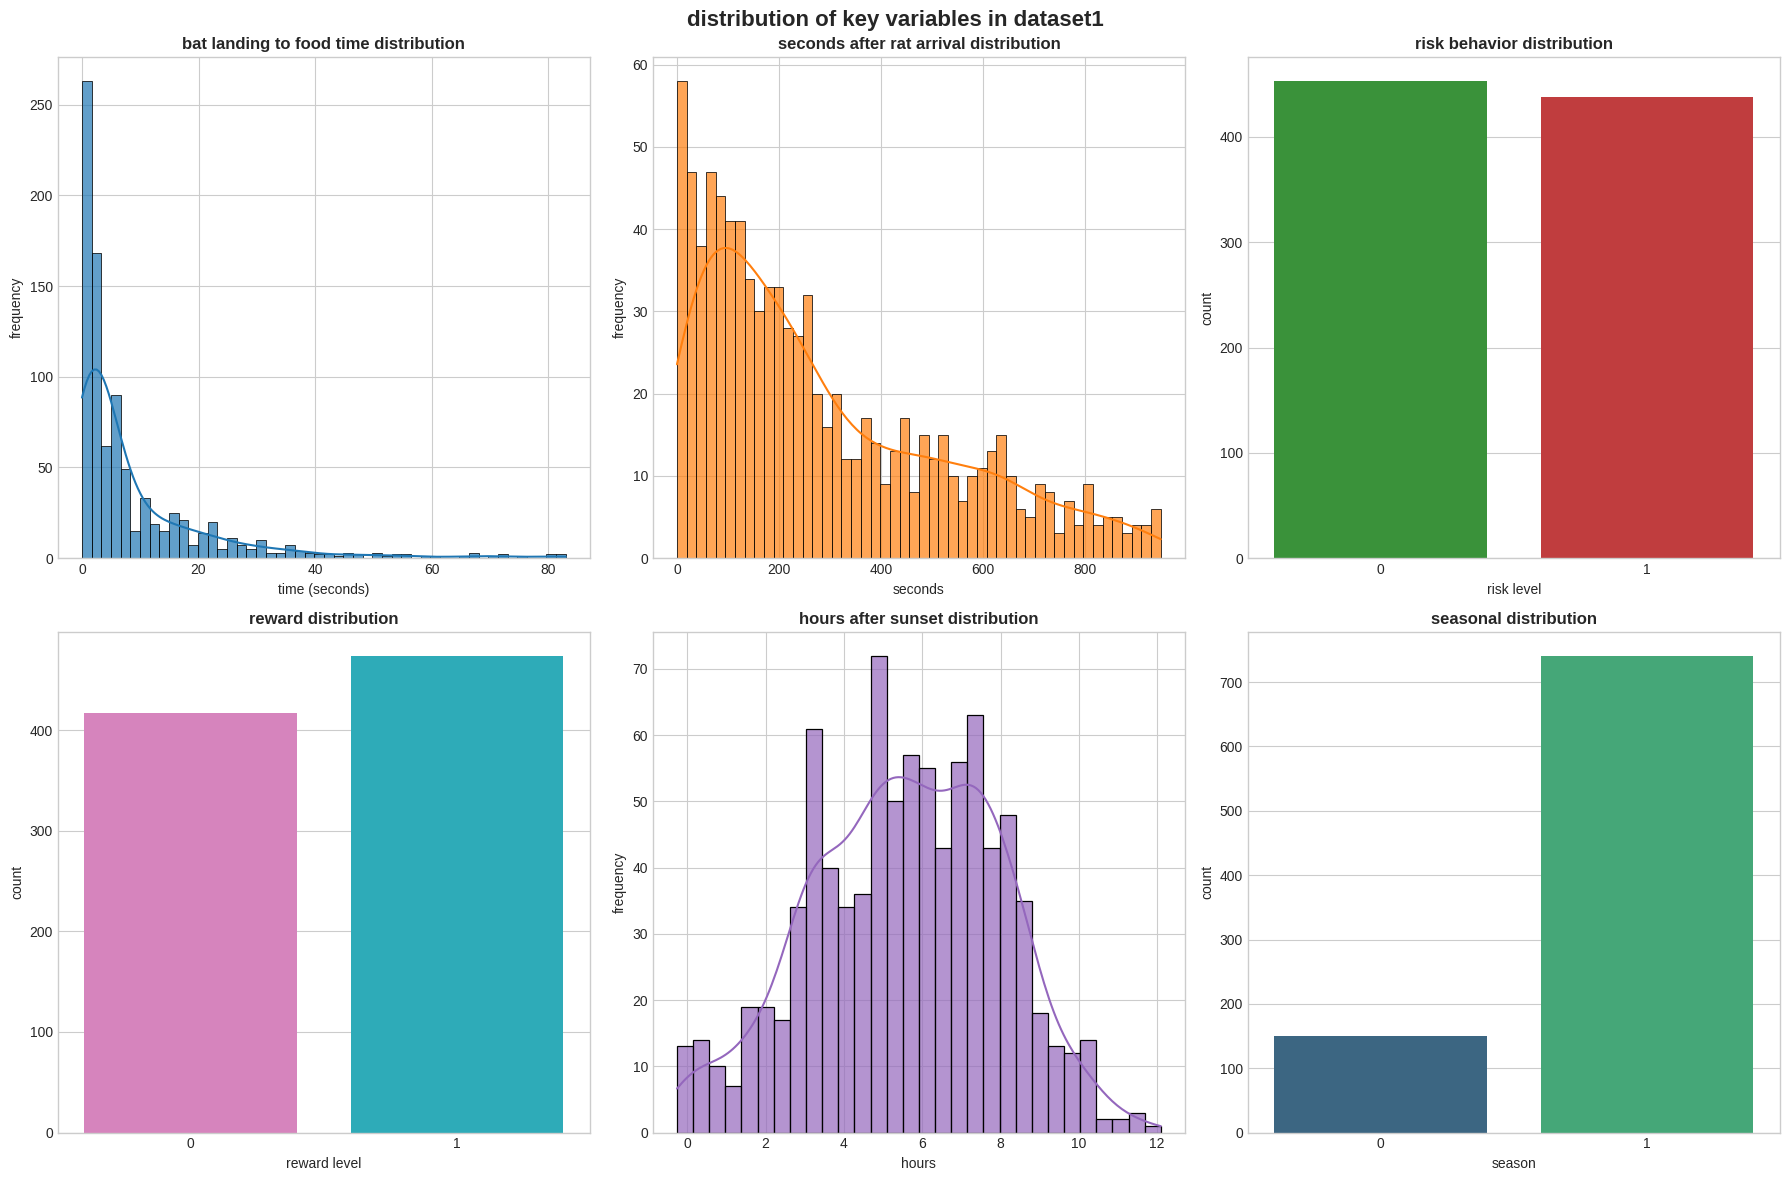

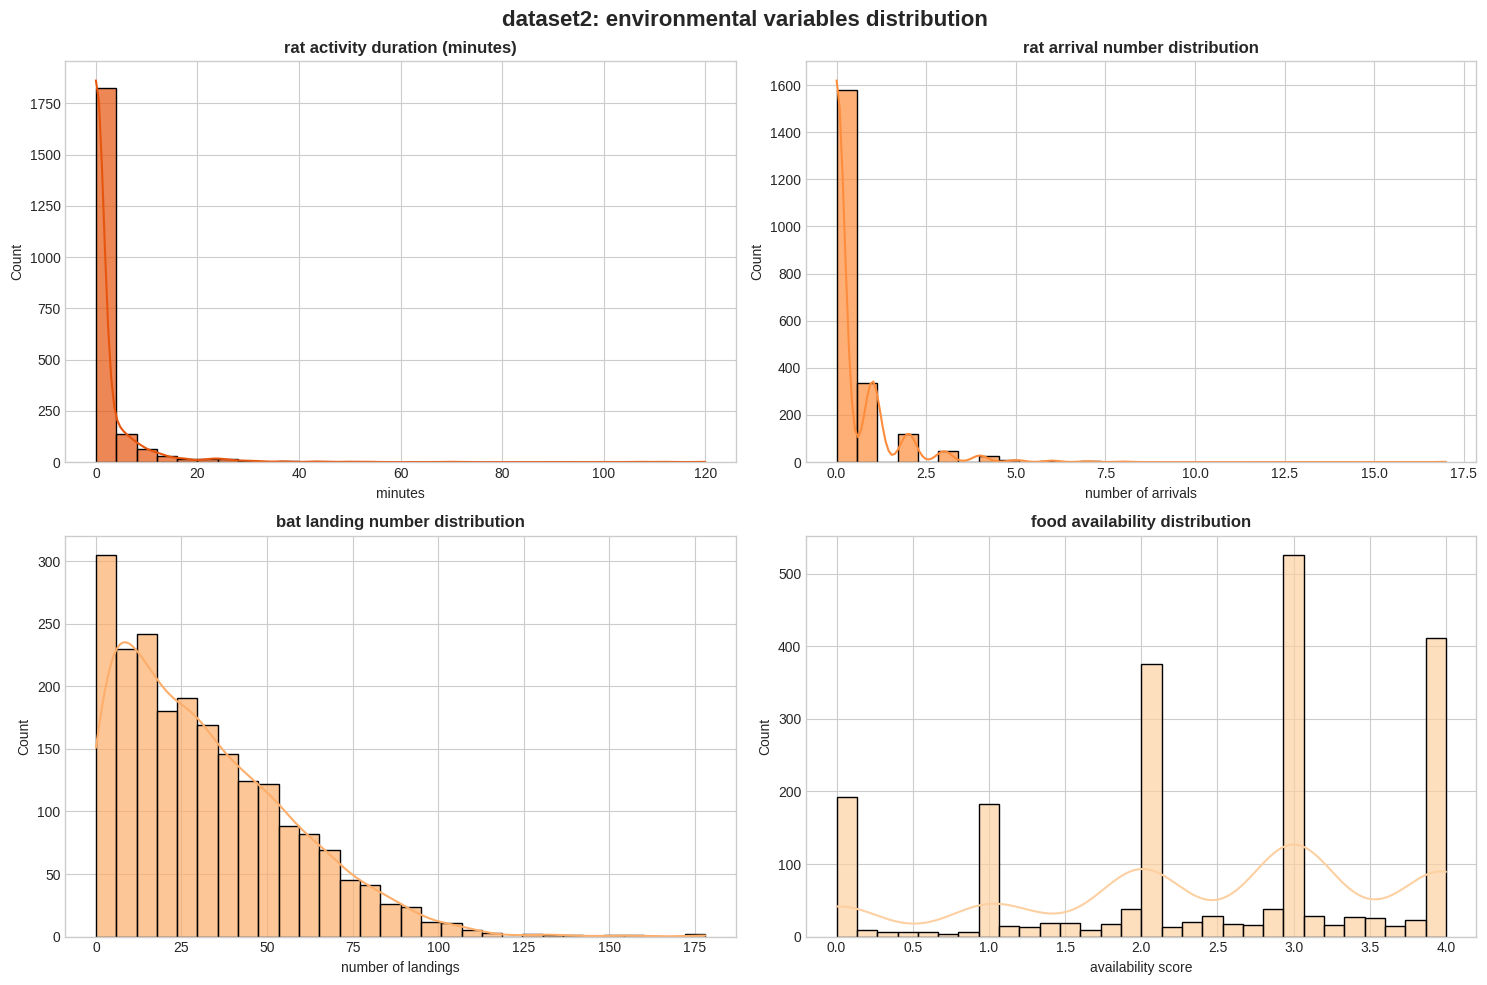

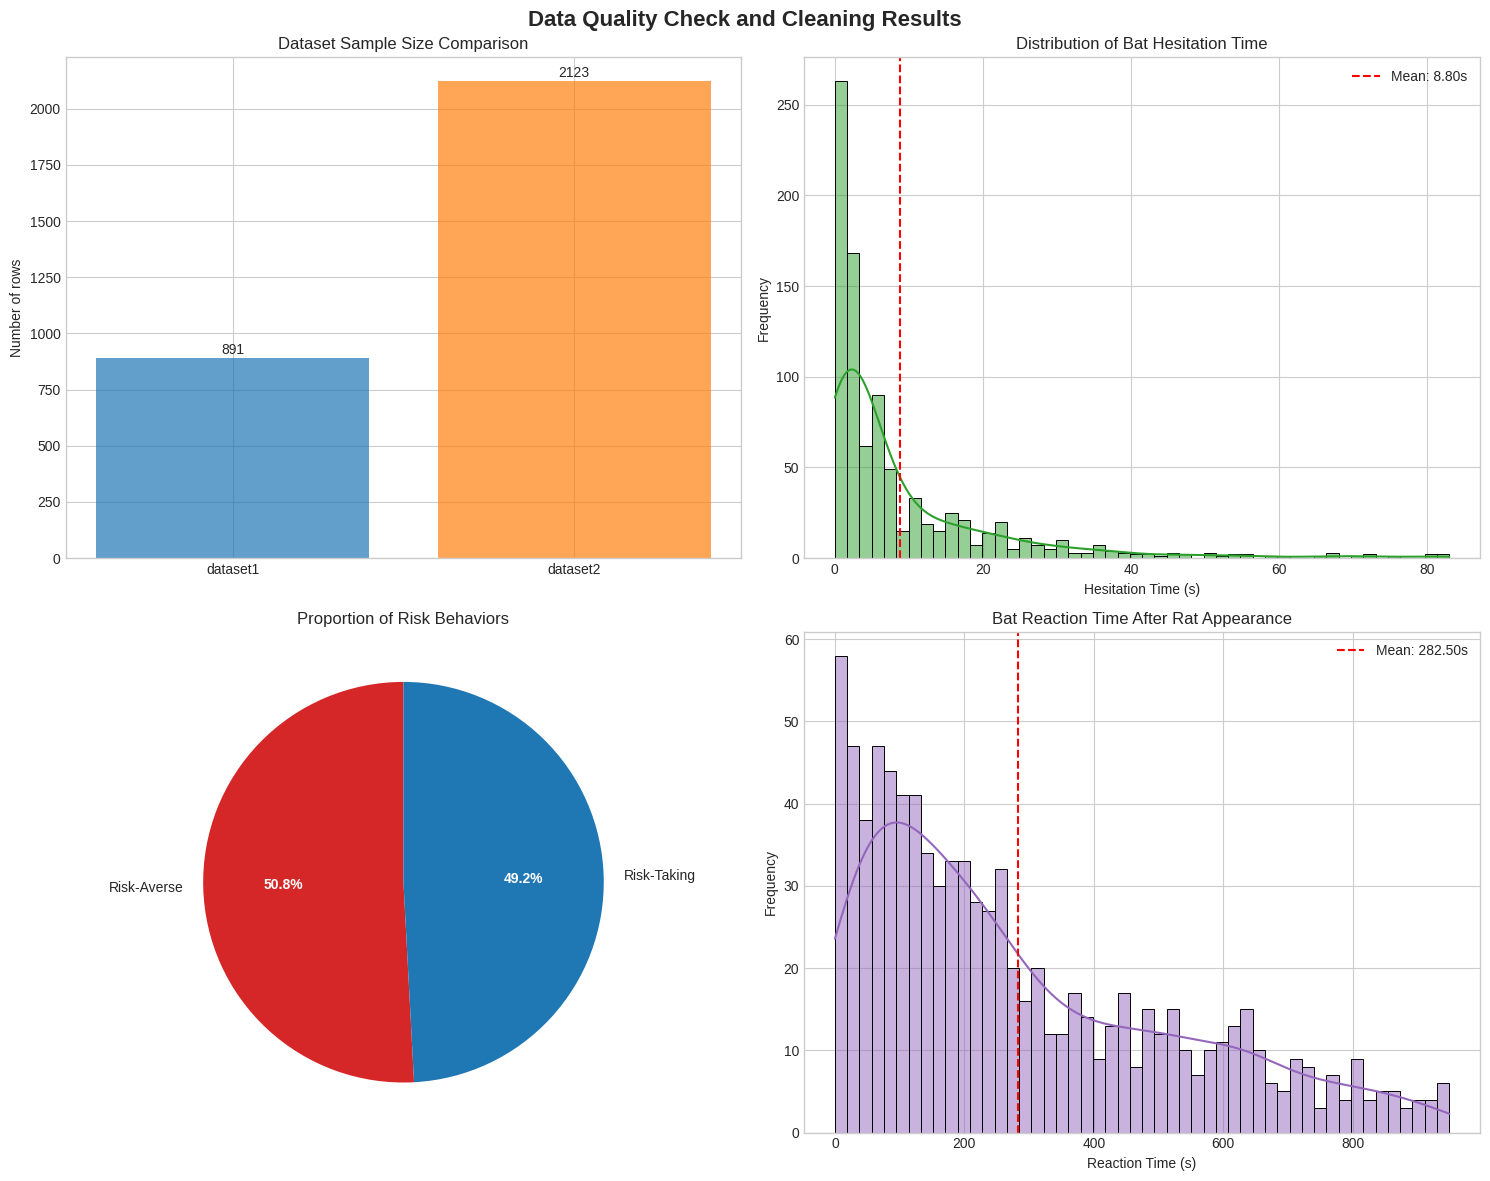

/tmp/ipython-input-2517329420.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='risk', y='bat_landing_to_food', ax=axes[0,0], palette='Blues')
/tmp/ipython-input-2517329420.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='risk', y='seconds_after_rat_arrival', ax=axes[0,1], palette='Greens')
/tmp/ipython-input-2517329420.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='risk', y='hours_after_sunset', ax=axes[0,2], palette='Purples')
/tmp/ipython-input-2517329420.py:181: UserWarning: Parsing 

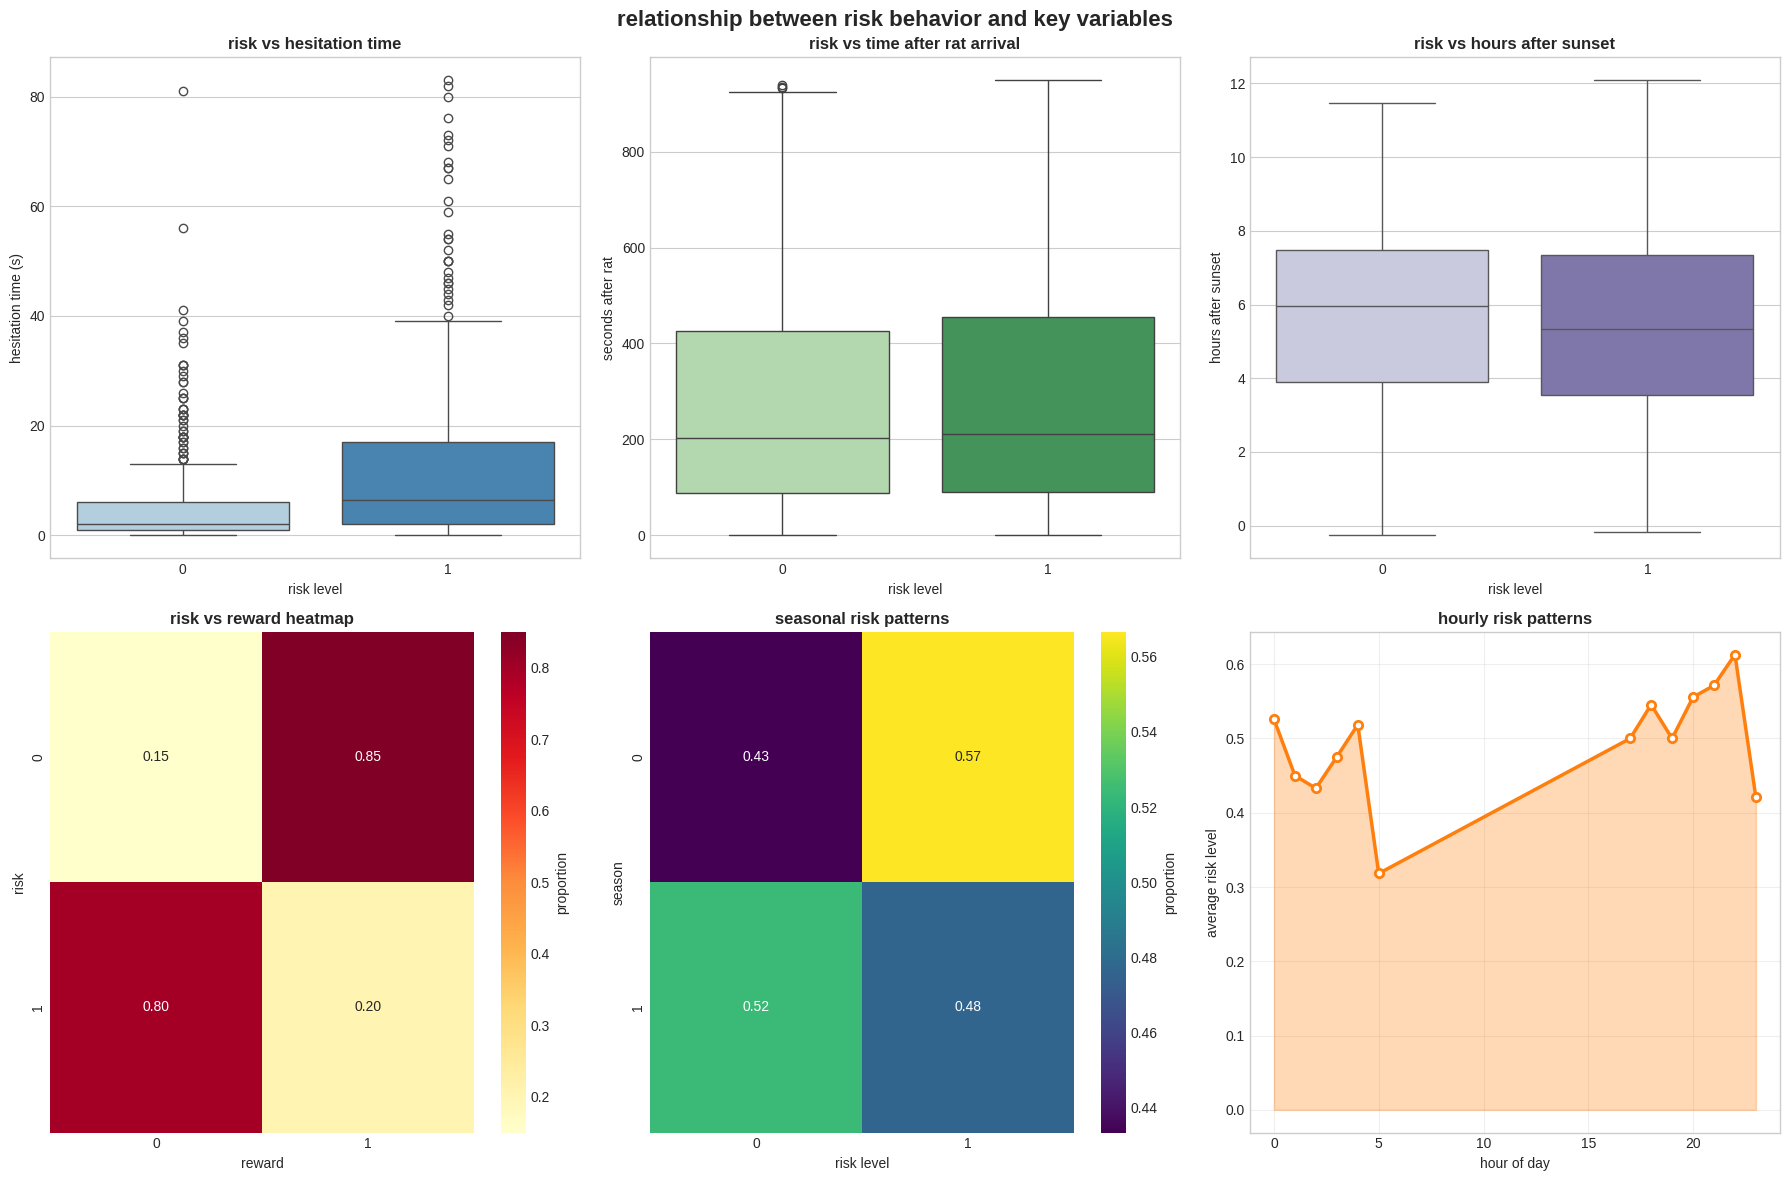


--- correlation analysis ---


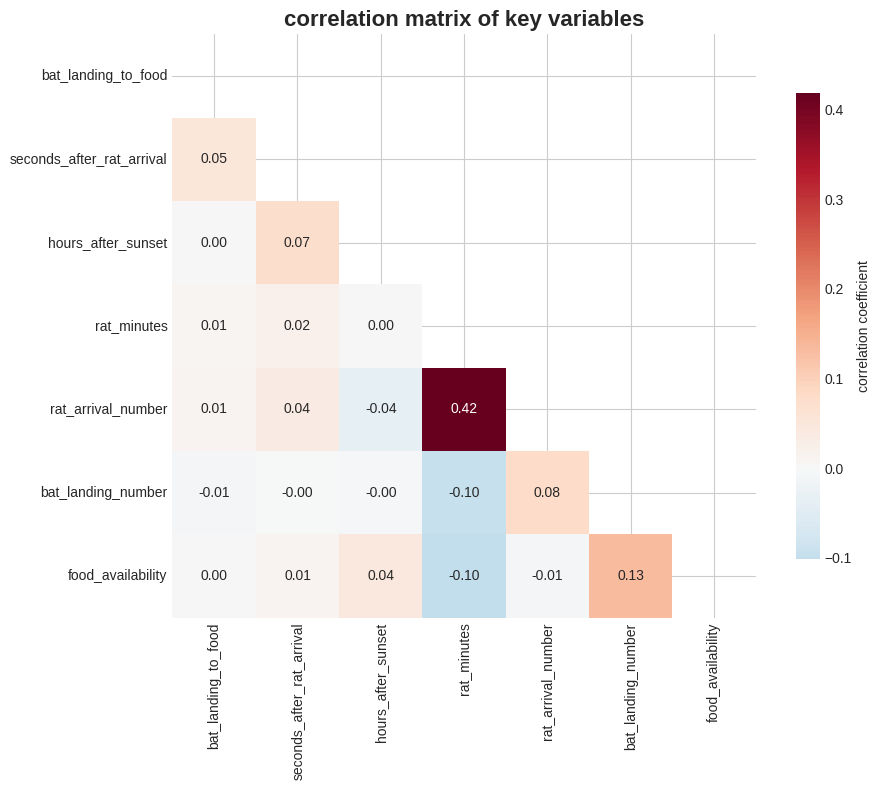

/tmp/ipython-input-2517329420.py:218: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['datetime'] = pd.to_datetime(df2['time'])


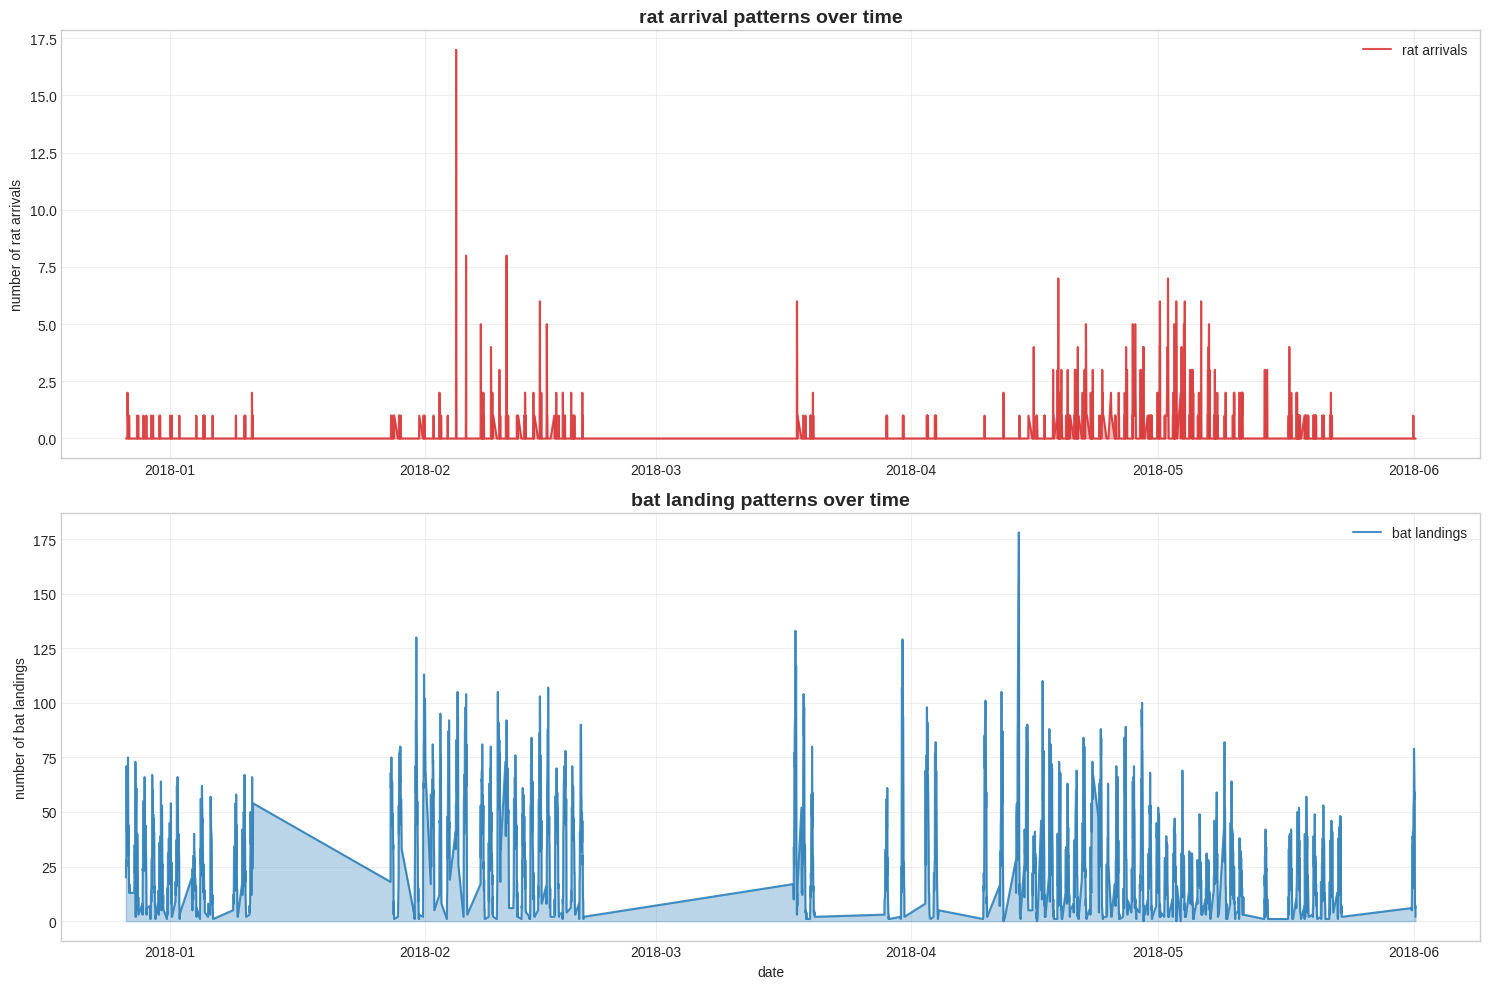

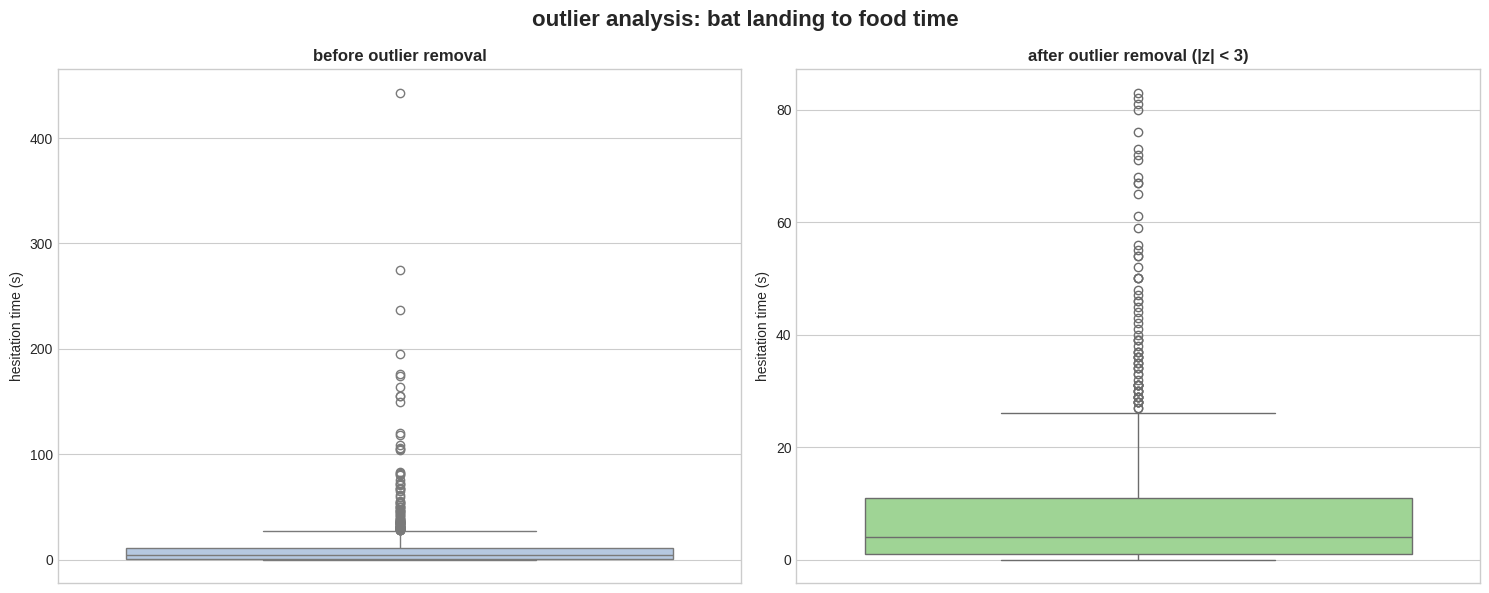


--- data prep summary ---

key insights from visualizations:
- distribution patterns reveal data characteristics and potential transformations needed
- risk behavior shows clear relationships with environmental factors
- temporal patterns suggest time-dependent behavioral changes
- correlation analysis identifies key variable relationships for modeling
- seasonal imbalance needs to be addressed in analysis


In [31]:
print('\n--- comprehensive data visualization with alternative color schemes ---')

# set professional style with alternative color palette
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")  # using Set2 palette for more color variations

# 1. distribution of key variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('distribution of key variables in dataset1', fontsize=16, fontweight='bold')

# bat_landing_to_food distribution
sns.histplot(data=df1, x='bat_landing_to_food', bins=50, ax=axes[0,0], kde=True, color='#1f77b4', alpha=0.7)
axes[0,0].set_title('bat landing to food time distribution', fontweight='bold')
axes[0,0].set_xlabel('time (seconds)')
axes[0,0].set_ylabel('frequency')
# comment: shows right-skewed distribution with most landings being quick, but some long delays

# seconds_after_rat_arrival distribution
sns.histplot(data=df1, x='seconds_after_rat_arrival', bins=50, ax=axes[0,1], kde=True, color='#ff7f0e', alpha=0.7)
axes[0,1].set_title('seconds after rat arrival distribution', fontweight='bold')
axes[0,1].set_xlabel('seconds')
axes[0,1].set_ylabel('frequency')
# comment: fairly uniform distribution, bats encounter rats at various time intervals

# risk distribution
sns.countplot(data=df1, x='risk', ax=axes[0,2], palette=['#2ca02c', '#d62728'])
axes[0,2].set_title('risk behavior distribution', fontweight='bold')
axes[0,2].set_xlabel('risk level')
axes[0,2].set_ylabel('count')
# comment: nearly balanced between risk-taking and risk-avoiding behavior

# reward distribution
sns.countplot(data=df1, x='reward', ax=axes[1,0], palette=['#e377c2', '#17becf'])
axes[1,0].set_title('reward distribution', fontweight='bold')
axes[1,0].set_xlabel('reward level')
axes[1,0].set_ylabel('count')
# comment: slightly more successful foraging events than unsuccessful ones

# hours_after_sunset distribution
sns.histplot(data=df1, x='hours_after_sunset', bins=30, ax=axes[1,1], kde=True, color='#9467bd', alpha=0.7)
axes[1,1].set_title('hours after sunset distribution', fontweight='bold')
axes[1,1].set_xlabel('hours')
axes[1,1].set_ylabel('frequency')
# comment: bats are active throughout the night with some concentration in early evening

# seasonal distribution if available -
if 'season' in df1.columns:
    sns.countplot(data=df1, x='season', ax=axes[1,2], palette='viridis')
    axes[1,2].set_title('seasonal distribution', fontweight='bold')
    axes[1,2].set_xlabel('season')
    axes[1,2].set_ylabel('count')
    # comment: shows significant imbalance between seasons, need to handle this in analysis
else:
    axes[1,2].set_visible(False)

plt.tight_layout()
plt.show()

# 2. dataset2 variables visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('dataset2: environmental variables distribution', fontsize=16, fontweight='bold')

if 'rat_minutes' in df2.columns:
    sns.histplot(data=df2, x='rat_minutes', bins=30, ax=axes[0,0], kde=True, color='#e6550d', alpha=0.7)
    axes[0,0].set_title('rat activity duration (minutes)', fontweight='bold')
    axes[0,0].set_xlabel('minutes')

if 'rat_arrival_number' in df2.columns:
    sns.histplot(data=df2, x='rat_arrival_number', bins=30, ax=axes[0,1], kde=True, color='#fd8d3c', alpha=0.7)
    axes[0,1].set_title('rat arrival number distribution', fontweight='bold')
    axes[0,1].set_xlabel('number of arrivals')


if 'bat_landing_number' in df2.columns:
    sns.histplot(data=df2, x='bat_landing_number', bins=30, ax=axes[1,0], kde=True, color='#fdae6b', alpha=0.7)
    axes[1,0].set_title('bat landing number distribution', fontweight='bold')
    axes[1,0].set_xlabel('number of landings')


if 'food_availability' in df2.columns:
    sns.histplot(data=df2, x='food_availability', bins=30, ax=axes[1,1], kde=True, color='#fdd0a2', alpha=0.7)
    axes[1,1].set_title('food availability distribution', fontweight='bold')
    axes[1,1].set_xlabel('availability score')

plt.tight_layout()
plt.show()




# same plotting code as yours, just with English titles and labels
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Data Quality Check and Cleaning Results', fontsize=16, fontweight='bold')

# 1. Dataset size comparison
datasets_info = pd.DataFrame({
    'dataset': ['dataset1', 'dataset2'],
    'rows': [df1.shape[0], df2.shape[0]],
    'columns': [df1.shape[1], df2.shape[1]]
})

axes[0,0].bar(datasets_info['dataset'], datasets_info['rows'], color=['#1f77b4', '#ff7f0e'], alpha=0.7)
axes[0,0].set_title('Dataset Sample Size Comparison')
axes[0,0].set_ylabel('Number of rows')
for i, v in enumerate(datasets_info['rows']):
    axes[0,0].text(i, v + 5, str(v), ha='center', va='bottom')

# 2. Key variable distribution - hesitation time
sns.histplot(data=df1, x='bat_landing_to_food', bins=50, ax=axes[0,1], kde=True, color='#2ca02c')
axes[0,1].axvline(df1['bat_landing_to_food'].mean(), color='red', linestyle='--',
                 label=f'Mean: {df1["bat_landing_to_food"].mean():.2f}s')
axes[0,1].set_title('Distribution of Bat Hesitation Time')
axes[0,1].set_xlabel('Hesitation Time (s)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# 3. Risk behavior distribution
risk_counts = df1['risk'].value_counts()
risk_labels = ['Risk-Averse', 'Risk-Taking']
colors = ['#d62728', '#1f77b4']
wedges, texts, autotexts = axes[1,0].pie(risk_counts.values, labels=risk_labels, autopct='%1.1f%%',
                                        colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
axes[1,0].set_title('Proportion of Risk Behaviors')

# 4. Reaction time after rat appearance
sns.histplot(data=df1, x='seconds_after_rat_arrival', bins=50, ax=axes[1,1], kde=True, color='#9467bd')
axes[1,1].axvline(df1['seconds_after_rat_arrival'].mean(), color='red', linestyle='--',
                 label=f'Mean: {df1["seconds_after_rat_arrival"].mean():.2f}s')
axes[1,1].set_title('Bat Reaction Time After Rat Appearance')
axes[1,1].set_xlabel('Reaction Time (s)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()
# 3. relationship between risk and key variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('relationship between risk behavior and key variables', fontsize=16, fontweight='bold')

# risk vs bat_landing_to_food
sns.boxplot(data=df1, x='risk', y='bat_landing_to_food', ax=axes[0,0], palette='Blues')
axes[0,0].set_title('risk vs hesitation time', fontweight='bold')
axes[0,0].set_xlabel('risk level')
axes[0,0].set_ylabel('hesitation time (s)')

# risk vs seconds_after_rat_arrival
sns.boxplot(data=df1, x='risk', y='seconds_after_rat_arrival', ax=axes[0,1], palette='Greens')
axes[0,1].set_title('risk vs time after rat arrival', fontweight='bold')
axes[0,1].set_xlabel('risk level')
axes[0,1].set_ylabel('seconds after rat')


# risk vs hours_after_sunset
sns.boxplot(data=df1, x='risk', y='hours_after_sunset', ax=axes[0,2], palette='Purples')
axes[0,2].set_title('risk vs hours after sunset', fontweight='bold')
axes[0,2].set_xlabel('risk level')
axes[0,2].set_ylabel('hours after sunset')


# risk vs reward
risk_reward = pd.crosstab(df1['risk'], df1['reward'], normalize='index')
sns.heatmap(risk_reward, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1,0], cbar_kws={'label': 'proportion'})
axes[1,0].set_title('risk vs reward heatmap', fontweight='bold')
axes[1,0].set_xlabel('reward')
axes[1,0].set_ylabel('risk')
# comment: risk-avoiders get rewards more often (85% vs 20%), showing avoidance is more effective strategy

# seasonal risk patterns
if 'season' in df1.columns:
    seasonal_risk = pd.crosstab(df1['season'], df1['risk'], normalize='index')
    sns.heatmap(seasonal_risk, annot=True, fmt='.2f', cmap='viridis', ax=axes[1,1], cbar_kws={'label': 'proportion'})
    axes[1,1].set_title('seasonal risk patterns', fontweight='bold')
    axes[1,1].set_xlabel('risk level')
    axes[1,1].set_ylabel('season')


# time of day patterns
df1['hour'] = pd.to_datetime(df1['start_time']).dt.hour
hourly_risk = df1.groupby('hour')['risk'].mean()
axes[1,2].plot(hourly_risk.index, hourly_risk.values, marker='o', linewidth=2.5,
               color='#ff7f0e', markersize=6, markerfacecolor='white', markeredgewidth=2)
axes[1,2].fill_between(hourly_risk.index, hourly_risk.values, alpha=0.3, color='#ff7f0e')
axes[1,2].set_title('hourly risk patterns', fontweight='bold')
axes[1,2].set_xlabel('hour of day')
axes[1,2].set_ylabel('average risk level')
axes[1,2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. correlation analysis
print('\n--- correlation analysis ---')

# select numerical variables for correlation
numerical_vars = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset']
if 'rat_minutes' in df2.columns:
    numerical_vars.extend(['rat_minutes', 'rat_arrival_number', 'bat_landing_number', 'food_availability'])

# create correlation matrix
corr_vars = [var for var in numerical_vars if var in df1.columns or var in df2.columns]
corr_data = pd.concat([df1[['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset']],
                      df2[['rat_minutes', 'rat_arrival_number', 'bat_landing_number', 'food_availability']].iloc[:len(df1)]],
                     axis=1)

plt.figure(figsize=(10, 8))
corr_matrix = corr_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8, "label": "correlation coefficient"})
plt.title('correlation matrix of key variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. time series analysis of rat activity and bat behavior
if 'time' in df2.columns:
    df2['datetime'] = pd.to_datetime(df2['time'])
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))

    # rat activity over time - red
    axes[0].plot(df2['datetime'], df2['rat_arrival_number'], label='rat arrivals',
                color='#d62728', alpha=0.8, linewidth=1.5)
    axes[0].fill_between(df2['datetime'], df2['rat_arrival_number'], alpha=0.3, color='#d62728')
    axes[0].set_title('rat arrival patterns over time', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('number of rat arrivals')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    # comment: rat activity shows clear temporal patterns, possibly related to moon phases or weather

    # bat activity over time - blue
    axes[1].plot(df2['datetime'], df2['bat_landing_number'], label='bat landings',
                color='#1f77b4', alpha=0.8, linewidth=1.5)
    axes[1].fill_between(df2['datetime'], df2['bat_landing_number'], alpha=0.3, color='#1f77b4')
    axes[1].set_title('bat landing patterns over time', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('number of bat landings')
    axes[1].set_xlabel('date')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    # comment: bat activity also shows temporal patterns, may be responding to rat presence or environmental factors

    plt.tight_layout()
    plt.show()

# 6. outlier analysis before and after removal
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('outlier analysis: bat landing to food time', fontsize=16, fontweight='bold')

# before outlier removal (using original data)
original_data = pd.read_csv('dataset1.csv')
sns.boxplot(data=original_data, y='bat_landing_to_food', ax=axes[0], color='#aec7e8')
axes[0].set_title('before outlier removal', fontweight='bold')
axes[0].set_ylabel('hesitation time (s)')


# after outlier removal
sns.boxplot(data=df1, y='bat_landing_to_food', ax=axes[1], color='#98df8a')
axes[1].set_title('after outlier removal (|z| < 3)', fontweight='bold')
axes[1].set_ylabel('hesitation time (s)')
# comment: outliers removed, data now more suitable for statistical modeling

plt.tight_layout()
plt.show()

print('\n--- data prep summary ---')
print("""
key insights from visualizations:
- distribution patterns reveal data characteristics and potential transformations needed
- risk behavior shows clear relationships with environmental factors
- temporal patterns suggest time-dependent behavioral changes
- correlation analysis identifies key variable relationships for modeling
- seasonal imbalance needs to be addressed in analysis""")


In [20]:

print('\n--- 2.1 basic descriptive statistics ---')
des=df1['bat_landing_to_food'].describe()
print(des)


#interquartile Range (IQR) = Q3 - Q1
# it shows the spread of the middle 50% of the data
IQR = des['75%'] - des['25%']
print(f"\nIQR: {IQR}")


x_bar = df1['bat_landing_to_food'].mean()
s = df1['bat_landing_to_food'].std()
n= len(df1)
z_score= st.norm.ppf(0.975)
print(f'\nz_score: {z_score:.2f}')
std_err =s/math.sqrt(n)

#confidence intervals using statsmodels
# Two-sided 95% CI
ci_low_tw, ci_upp_tw = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="two-sided")
print(f'\nTwo-sided 95% CI: {ci_low_tw:.2f} to {ci_upp_tw:.2f}')



 #One-sided 95% CI (upper bound and lower bound)
ci_low_up, ci_upp_up = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="larger")
print(f'One-sided (upper) 95% CI: {ci_low_up:.2f} to {ci_upp_up:.2f}')
ci_low_down, ci_upp_down = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="smaller")
print(f'\nOne-sided (lower) 95% CI: {ci_low_down:.2f} to {ci_upp_down:.2f}')



#the average hesitation time of the risk-averse group (risk=0)
#and the risk-taking group (risk=1)
meanlr0 = df1[df1['risk'] == 0]['bat_landing_to_food'].mean()
meanlr1 = df1[df1['risk'] == 1]['bat_landing_to_food'].mean()

print(f'Mean latency Risk=0 (Avoidance): {meanlr0:.2f} s')
print(f'\nMean latency Risk=1 (Taking): {meanlr1:.2f} s')


# median is also calculated because the data has a skewed distribution.
medianlr0 = df1[df1['risk'] == 0]['bat_landing_to_food'].median()
medianlr1 = df1[df1['risk'] == 1]['bat_landing_to_food'].median()

print(f'Median latency Risk=0: {medianlr0:.2f} s')
print(f'Median latency Risk=1: {medianlr1:.2f} s')




print("\n--- 2.2 risk frequency and proportion analysis ---")

# risk behavior analysis
risk_count= df1['risk'].value_counts()
risk_percentage=df1['risk'].value_counts(normalize=True) * 100
print(f'risk_count: {risk_count}')
print(f'\nrisk_percentage: {risk_percentage.round(2)}')

 #count of risk-taking
prop=df1['risk'].sum()
total=len(df1)
conf_lvl=0.95
a=0.05


#Calculate CI for the proportion of risk-taking behaviour
ci_low, ci_upp = smp.proportion_confint(prop, total, alpha=a, method='normal')
print(f'\n95% CI for risk proportion (normal): {ci_low:.3f} to {ci_upp:.3f}')


print("\n--- 2.3 Microanalysis,Risk-taking behaviour ---")


#season vs risk analysis
season_risk = df1.groupby(['season', 'risk']).size().unstack(fill_value=0)
season_risk['risk_ratio'] = season_risk[1] / (season_risk[0]+season_risk[1])
print(f"\nseason_risk:{season_risk.round(2)}")


 # month vs risk analysis

month_risk = df1.groupby(['month', 'risk']).size().unstack(fill_value=0)
month_risk['risk_ratio'] = month_risk[1] / (month_risk[0]+month_risk[1])
print(f"\nmonth_risk:{month_risk.round(2)}")

#habit distribution
print(df1['habit'].value_counts())
print()


#habit_category and analysis
valid_habits = ['fast', 'rat', 'pick', 'bat', 'bat_fight', 'rat_bat_fight', 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']
df1['habit_category'] = df1['habit'].apply(lambda x: x if x in valid_habits else 'other')

habit_risk = df1.groupby(['habit_category', 'risk']).size().unstack(fill_value=0)
habit_risk['risk_ratio'] = habit_risk[1] / (habit_risk[0] + habit_risk[1])
print(f'\nhabit vs risk :{ habit_risk.round(2)}')

#reward Rate by risk
reward_rate = df1.groupby('risk')['reward'].mean()
print('\nreward rate by risk:', reward_rate.round(2))



--- 2.1 basic descriptive statistics ---
count    891.000000
mean       8.796647
std       12.974521
min        0.010238
25%        1.000000
50%        4.000000
75%       11.000000
max       83.000000
Name: bat_landing_to_food, dtype: float64

IQR: 10.0

z_score: 1.96

Two-sided 95% CI: 7.94 to 9.65
One-sided (upper) 95% CI: 8.08 to inf

One-sided (lower) 95% CI: -inf to 9.51
Mean latency Risk=0 (Avoidance): 5.18 s

Mean latency Risk=1 (Taking): 12.54 s
Median latency Risk=0: 2.00 s
Median latency Risk=1: 6.50 s

--- 2.2 risk frequency and proportion analysis ---
risk_count: risk
0    453
1    438
Name: count, dtype: int64

risk_percentage: risk
0    50.84
1    49.16
Name: proportion, dtype: float64

95% CI for risk proportion (normal): 0.459 to 0.524

--- 2.3 Microanalysis,Risk-taking behaviour ---

season_risk:risk      0    1  risk_ratio
season                      
0        65   85        0.57
1       388  353        0.48

month_risk:risk     0    1  risk_ratio
month              


--- 2.4 professional visualization for statistical analysis ---


/tmp/ipython-input-3986360551.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = axes[0,2].boxplot(risk_data, labels=['risk-averse', 'risk-taking'], patch_artist=True)


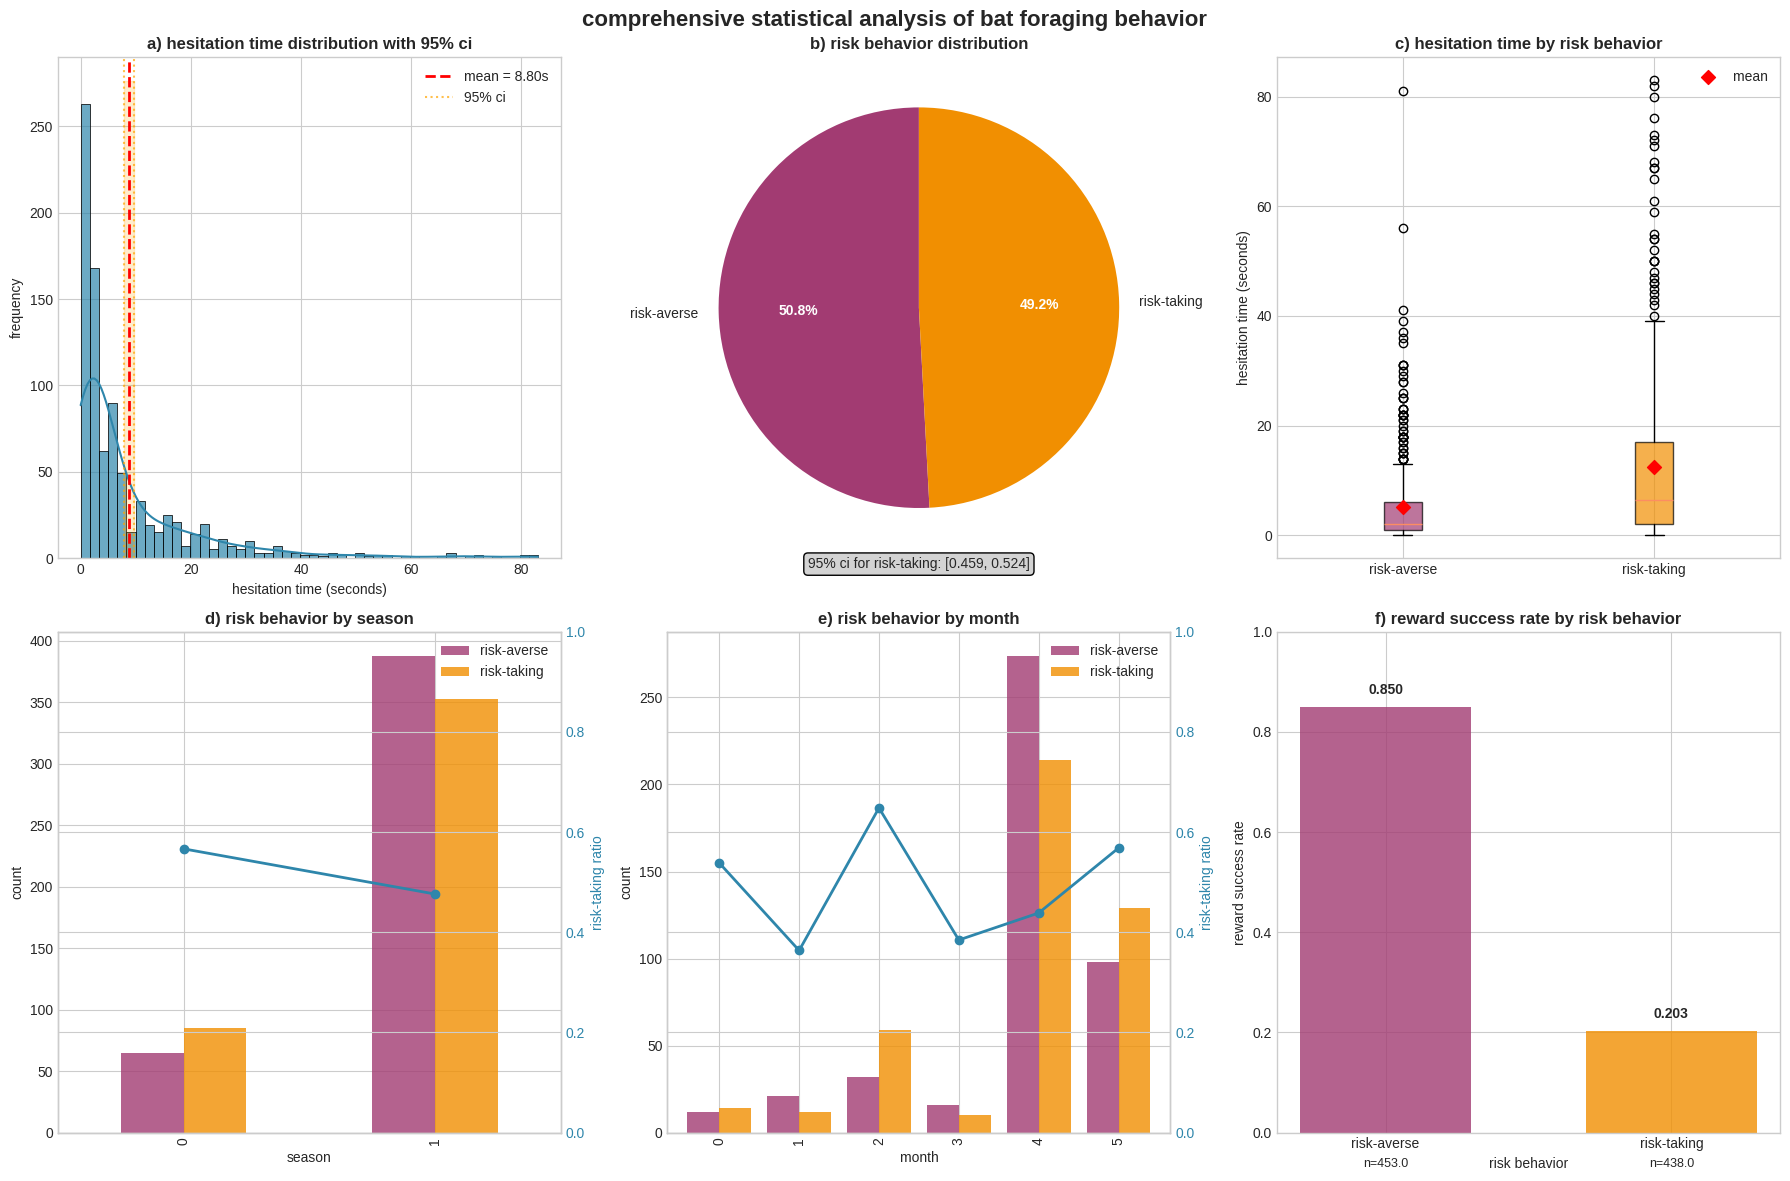


--- 2.5 detailed habit behavior analysis ---


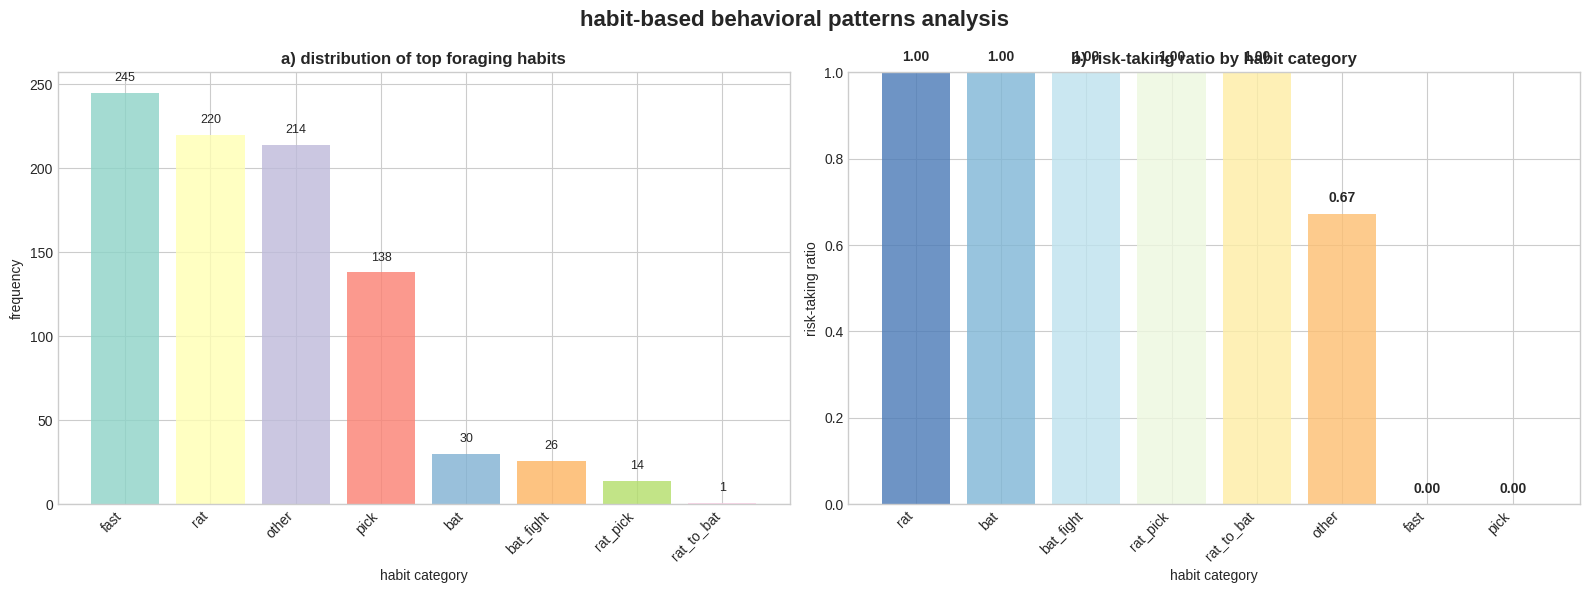


--- 2.6 statistical summary ---


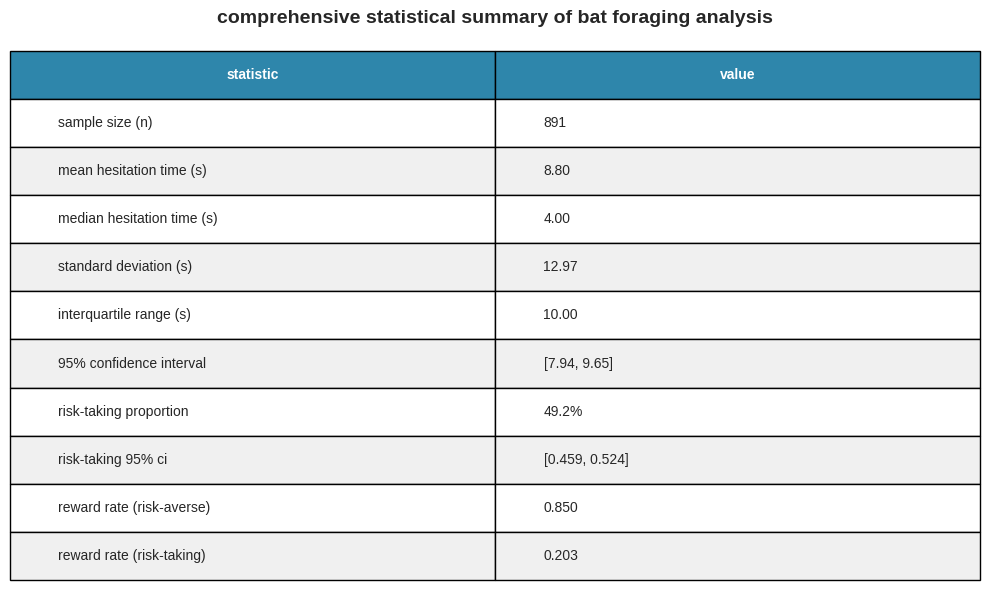


--- key findings from statistical analysis ---

1. hesitation time shows right-skewed distribution with mean = 8.80s ± 0.85s (95% ci)
2. risk behavior is nearly balanced: 49.2% risk-taking vs 50.8% risk-averse
3. risk-takers show shorter hesitation times (12.54s vs 5.18s) suggesting more decisive behavior
4. reward success is 0.20319634703196346 for risk-takers vs 0.8498896247240618 for risk-averse bats
5. seasonal and monthly patterns show variation in risk-taking behavior
6. different foraging habits are associated with varying levels of risk propensity




In [21]:


print('\n--- 2.4 professional visualization for statistical analysis ---')

# set professional academic style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# 1. distribution with confidence intervals
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('comprehensive statistical analysis of bat foraging behavior', fontsize=16, fontweight='bold')

# 1.1 hesitation time distribution with confidence intervals
sns.histplot(data=df1, x='bat_landing_to_food', bins=50, ax=axes[0,0], kde=True, color='#2E86AB', alpha=0.7)
axes[0,0].axvline(x_bar, color='red', linestyle='--', linewidth=2, label=f'mean = {x_bar:.2f}s')
axes[0,0].axvline(ci_low_tw, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label='95% ci')
axes[0,0].axvline(ci_upp_tw, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)
axes[0,0].fill_betweenx([0, axes[0,0].get_ylim()[1]], ci_low_tw, ci_upp_tw, alpha=0.2, color='orange')
axes[0,0].set_title('a) hesitation time distribution with 95% ci', fontweight='bold')
axes[0,0].set_xlabel('hesitation time (seconds)')
axes[0,0].set_ylabel('frequency')
axes[0,0].legend()

# 1.2 risk behavior distribution with proportion ci
risk_labels = ['risk-averse', 'risk-taking']
colors = ['#A23B72', '#F18F01']
wedges, texts, autotexts = axes[0,1].pie(risk_count.values, labels=risk_labels, autopct='%1.1f%%',
                                        colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
axes[0,1].set_title('b) risk behavior distribution', fontweight='bold')
# add confidence interval annotation
axes[0,1].text(0, -1.3, f'95% ci for risk-taking: [{ci_low:.3f}, {ci_upp:.3f}]',
               ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

# 1.3 hesitation time by risk group
risk_data = [df1[df1['risk'] == 0]['bat_landing_to_food'],
             df1[df1['risk'] == 1]['bat_landing_to_food']]
box_plot = axes[0,2].boxplot(risk_data, labels=['risk-averse', 'risk-taking'], patch_artist=True)
# set colors for boxes
colors_box = ['#A23B72', '#F18F01']
for patch, color in zip(box_plot['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
# add mean lines
axes[0,2].scatter([1, 2], [meanlr0, meanlr1], color='red', marker='D', s=50, zorder=3, label='mean')
axes[0,2].set_title('c) hesitation time by risk behavior', fontweight='bold')
axes[0,2].set_ylabel('hesitation time (seconds)')
axes[0,2].legend()

# 1.4 seasonal risk patterns
if 'season' in df1.columns:
    season_risk_plot = season_risk[[0, 1]].plot(kind='bar', ax=axes[1,0], color=['#A23B72', '#F18F01'], alpha=0.8)
    axes[1,0].set_title('d) risk behavior by season', fontweight='bold')
    axes[1,0].set_xlabel('season')
    axes[1,0].set_ylabel('count')
    axes[1,0].legend(['risk-averse', 'risk-taking'])
    # add risk ratio as line plot on secondary axis
    ax2 = axes[1,0].twinx()
    season_risk['risk_ratio'].plot(ax=ax2, color='#2E86AB', marker='o', linewidth=2, markersize=6)
    ax2.set_ylabel('risk-taking ratio', color='#2E86AB')
    ax2.tick_params(axis='y', labelcolor='#2E86AB')
    ax2.set_ylim(0, 1)

# 1.5 monthly risk patterns
month_risk_plot = month_risk[[0, 1]].plot(kind='bar', ax=axes[1,1], color=['#A23B72', '#F18F01'], alpha=0.8, width=0.8)
axes[1,1].set_title('e) risk behavior by month', fontweight='bold')
axes[1,1].set_xlabel('month')
axes[1,1].set_ylabel('count')
axes[1,1].legend(['risk-averse', 'risk-taking'])
# add risk ratio as line plot on secondary axis
ax2_m = axes[1,1].twinx()
month_risk['risk_ratio'].plot(ax=ax2_m, color='#2E86AB', marker='o', linewidth=2, markersize=6)
ax2_m.set_ylabel('risk-taking ratio', color='#2E86AB')
ax2_m.tick_params(axis='y', labelcolor='#2E86AB')
ax2_m.set_ylim(0, 1)

# 1.6 reward rate by risk behavior
reward_data = df1.groupby('risk').agg({'reward': ['mean', 'count']})
reward_data.columns = ['mean_reward', 'count']
x_pos = np.arange(len(reward_data))
bars = axes[1,2].bar(x_pos, reward_data['mean_reward'], color=['#A23B72', '#F18F01'], alpha=0.8, width=0.6)
axes[1,2].set_title('f) reward success rate by risk behavior', fontweight='bold')
axes[1,2].set_xlabel('risk behavior')
axes[1,2].set_ylabel('reward success rate')
axes[1,2].set_xticks(x_pos)
axes[1,2].set_xticklabels(['risk-averse', 'risk-taking'])
axes[1,2].set_ylim(0, 1)
# add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1,2].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
    # add sample size below
    axes[1,2].text(bar.get_x() + bar.get_width()/2., -0.05,
                  f'n={reward_data.iloc[i]["count"]}', ha='center', va='top', fontsize=9)

plt.tight_layout()
plt.show()

# 2. detailed habit analysis visualization
print('\n--- 2.5 detailed habit behavior analysis ---')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('habit-based behavioral patterns analysis', fontsize=16, fontweight='bold')

# 2.1 habit distribution and risk ratio
habit_counts = df1['habit_category'].value_counts()
# only show top 8 habits for clarity
top_habits = habit_counts.head(8)
colors_habit = sns.color_palette("Set3", len(top_habits))

bars = axes[0].bar(range(len(top_habits)), top_habits.values, color=colors_habit, alpha=0.8)
axes[0].set_title('a) distribution of top foraging habits', fontweight='bold')
axes[0].set_xlabel('habit category')
axes[0].set_ylabel('frequency')
axes[0].set_xticks(range(len(top_habits)))
axes[0].set_xticklabels(top_habits.index, rotation=45, ha='right')
# add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height}', ha='center', va='bottom', fontsize=9)

# 2.2 risk ratio by habit
# calculate risk ratio for top habits
habit_risk_ratios = {}
for habit in top_habits.index:
    habit_data = df1[df1['habit_category'] == habit]
    if len(habit_data) > 0:
        risk_ratio = habit_data['risk'].mean()
        habit_risk_ratios[habit] = risk_ratio

# sort by risk ratio
sorted_habits = sorted(habit_risk_ratios.items(), key=lambda x: x[1], reverse=True)
habits_sorted = [item[0] for item in sorted_habits]
ratios_sorted = [item[1] for item in sorted_habits]

colors_risk = sns.color_palette("RdYlBu_r", len(habits_sorted))
bars_risk = axes[1].bar(range(len(habits_sorted)), ratios_sorted, color=colors_risk, alpha=0.8)
axes[1].set_title('b) risk-taking ratio by habit category', fontweight='bold')
axes[1].set_xlabel('habit category')
axes[1].set_ylabel('risk-taking ratio')
axes[1].set_xticks(range(len(habits_sorted)))
axes[1].set_xticklabels(habits_sorted, rotation=45, ha='right')
axes[1].set_ylim(0, 1)
# add value labels on bars
for i, bar in enumerate(bars_risk):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. statistical summary table visualization
print('\n--- 2.6 statistical summary ---')

# create summary statistics table
summary_stats = pd.DataFrame({
    'statistic': [
        'sample size (n)',
        'mean hesitation time (s)',
        'median hesitation time (s)',
        'standard deviation (s)',
        'interquartile range (s)',
        '95% confidence interval',
        'risk-taking proportion',
        'risk-taking 95% ci',
        'reward rate (risk-averse)',
        'reward rate (risk-taking)'
    ],
    'value': [
        f"{n}",
        f"{x_bar:.2f}",
        f"{df1['bat_landing_to_food'].median():.2f}",
        f"{s:.2f}",
        f"{IQR:.2f}",
        f"[{ci_low_tw:.2f}, {ci_upp_tw:.2f}]",
        f"{risk_percentage[1]:.1f}%",
        f"[{ci_low:.3f}, {ci_upp:.3f}]",
        f"{reward_rate[0]:.3f}",
        f"{reward_rate[1]:.3f}"
    ]
})

# create a figure for the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

# create table
table = ax.table(cellText=summary_stats.values,
                colLabels=summary_stats.columns,
                cellLoc='left',
                loc='center',
                bbox=[0, 0, 1, 1])

# style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# color header row
for i in range(len(summary_stats.columns)):
    table[(0, i)].set_facecolor('#2E86AB')
    table[(0, i)].set_text_props(weight='bold', color='white')

# alternate row colors
for i in range(1, len(summary_stats) + 1):
    if i % 2 == 0:
        for j in range(len(summary_stats.columns)):
            table[(i, j)].set_facecolor('#f0f0f0')

plt.title('comprehensive statistical summary of bat foraging analysis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print('\n--- key findings from statistical analysis ---')

print('''
1. hesitation time shows right-skewed distribution with mean = {:.2f}s ± {:.2f}s (95% ci)
2. risk behavior is nearly balanced: {:.1f}% risk-taking vs {:.1f}% risk-averse
3. risk-takers show shorter hesitation times ({:.2f}s vs {:.2f}s) suggesting more decisive behavior
4. reward success is {} for risk-takers vs {} for risk-averse bats
5. seasonal and monthly patterns show variation in risk-taking behavior
6. different foraging habits are associated with varying levels of risk propensity

'''.
      format(x_bar, (ci_upp_tw - ci_low_tw)/2, risk_percentage[1], risk_percentage[0],
          meanlr1, meanlr0, reward_rate[1], reward_rate[0]))

In [22]:
# --- 3: feature engineering ---
print("\n--- 3: feature engineering ---")

# 0. drop features with lots of missing values if they exist
drop_cols = [col for col in ['bat_to_rat_ratio', 'food_availability_norm'] if col in df1.columns]
if drop_cols:
    df1 = df1.drop(columns=drop_cols)

# 1. basic time features (1)
df1['is_night'] = (df1['hours_after_sunset'] > 0).astype(int)


# 2. rat threat features (3)
df1['immediate_rat_threat'] = (df1['seconds_after_rat_arrival'] <= 60).astype(int)
df1['seconds_after_rat_arrival_sq'] = df1['seconds_after_rat_arrival']**2
df1['rat_presence_duration'] = (
    pd.to_datetime(df1['rat_period_end'], dayfirst=True) -
    pd.to_datetime(df1['rat_period_start'], dayfirst=True)
).dt.total_seconds()

# 3. risk-reward features (3)
df1['successful_risk'] = df1['risk'] * df1['reward']
df1['foraging_efficiency'] = df1['reward'] / (df1['bat_landing_to_food'] + 1)
df1['risk_rat_interaction'] = df1['risk'] * df1['immediate_rat_threat']
df1['temporal_risk_adjustment'] = df1['risk'] * (1 / (df1['hours_after_sunset'] + 1))

# 4. optional: one-hot encode month if exists
if 'month' in df1.columns:
    df1 = pd.get_dummies(df1, columns=['month'], drop_first=True)

# 5. dataset2 features if available
if 'df2' in globals():
    for col in ['rat_minutes', 'bat_landing_number', 'rat_arrival_number', 'food_availability']:
        if col in df2.columns:
            df2[col + '_norm'] = (df2[col] - df2[col].min()) / (df2[col].max() - df2[col].min())
    if 'bat_landing_number' in df2.columns and 'rat_arrival_number' in df2.columns:
        df2['bat_to_rat_ratio'] = df2['bat_landing_number'] / df2['rat_arrival_number'].replace(0, np.nan)
    merge_cols = [c for c in ['time','bat_to_rat_ratio','food_availability_norm'] if c in df2.columns]
    if merge_cols:
        df1 = df1.merge(df2[merge_cols], left_on='start_time', right_on='time', how='left')
        if 'time' in df1.columns:
            df1.drop(columns=['time'], inplace=True)

# 6. feature list
features = [
    'hours_after_sunset', 'is_night', 'seconds_after_rat_arrival', 'immediate_rat_threat',
     'risk', 'reward', 'successful_risk', 'foraging_efficiency',
    'risk_rat_interaction', 'temporal_risk_adjustment'
]

# 7. correlation check
existing_features = [f for f in features if f in df1.columns]
print(f"target features before correlation check: {len(existing_features)}")
print(f"features: {existing_features}")
corr_matrix = df1[existing_features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [col for col in upper.columns if any(upper[col] > 0.8)]
if high_corr_features:
    df1 = df1.drop(columns=high_corr_features)
    existing_features = [f for f in existing_features if f not in high_corr_features]
    print("these features got removed to reduce collinearity and overfitting:", high_corr_features)
else:
    print("no highly correlated features found")

# check if key relationships still hold
key_relationships = [
    ('seconds_after_rat_arrival', 'immediate_rat_threat'),
    ('risk', 'successful_risk'),
    ('risk', 'risk_rat_interaction'),
    ('immediate_rat_threat', 'risk_rat_interaction')
]

print("\nkey relationships in final feature set:")
for feat1, feat2 in key_relationships:
    if feat1 in existing_features and feat2 in existing_features:
        corr = df1[feat1].corr(df1[feat2])
        print(f"  {feat1} vs {feat2}: {corr:.3f} {'✓' if abs(corr) > 0.3 else '✗'}")
    else:
        print(f"  {feat1} vs {feat2}: feature missing")

print(f"\nfinal feature count: {len(existing_features)}")
print("final features:", existing_features)


--- 3: feature engineering ---
target features before correlation check: 10
features: ['hours_after_sunset', 'is_night', 'seconds_after_rat_arrival', 'immediate_rat_threat', 'risk', 'reward', 'successful_risk', 'foraging_efficiency', 'risk_rat_interaction', 'temporal_risk_adjustment']
no highly correlated features found

key relationships in final feature set:
  seconds_after_rat_arrival vs immediate_rat_threat: -0.484 ✓
  risk vs successful_risk: 0.339 ✓
  risk vs risk_rat_interaction: 0.306 ✓
  immediate_rat_threat vs risk_rat_interaction: 0.664 ✓

final feature count: 10
final features: ['hours_after_sunset', 'is_night', 'seconds_after_rat_arrival', 'immediate_rat_threat', 'risk', 'reward', 'successful_risk', 'foraging_efficiency', 'risk_rat_interaction', 'temporal_risk_adjustment']



--- feature engineering visualization ---


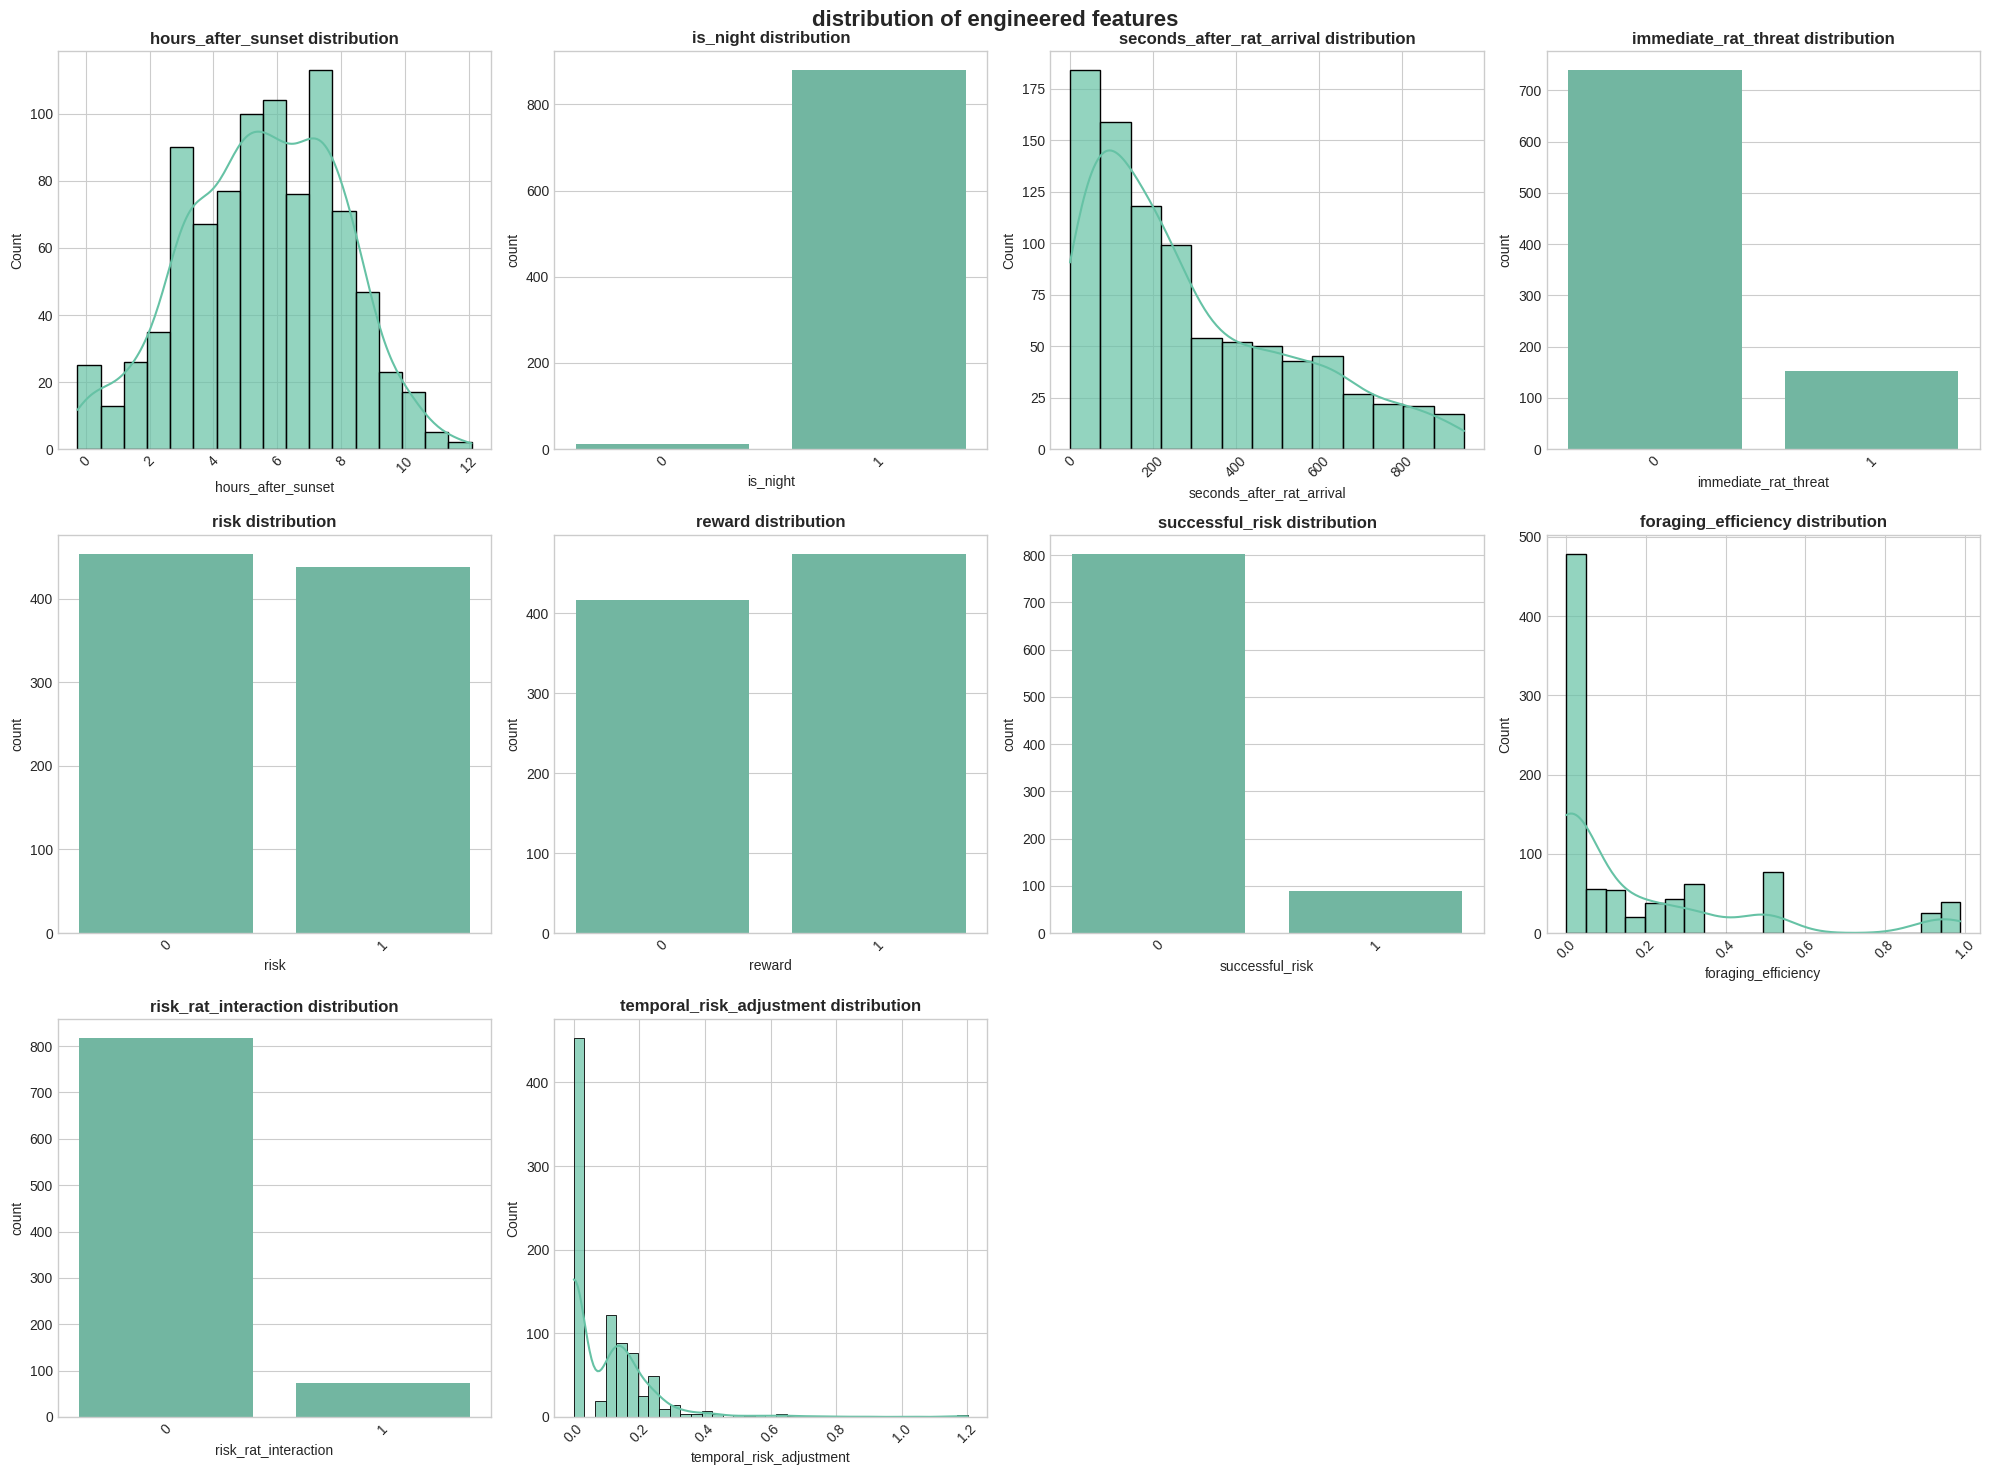


--- comprehensive correlation analysis ---
key correlation patterns:
seconds_after_rat_arrival vs immediate_rat_threat: -0.48
  → moderate correlation
risk vs successful_risk: 0.34
  → moderate correlation
risk vs risk_rat_interaction: 0.31
  → moderate correlation
immediate_rat_threat vs risk_rat_interaction: 0.66
  → strong positive correlation


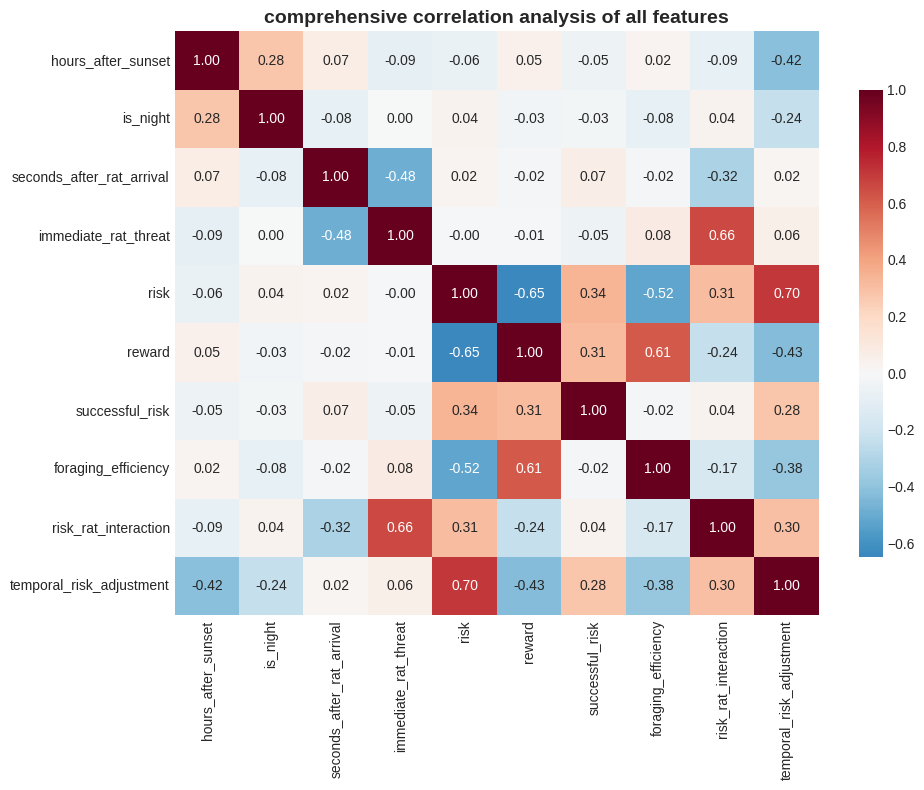


--- feature importance analysis ---


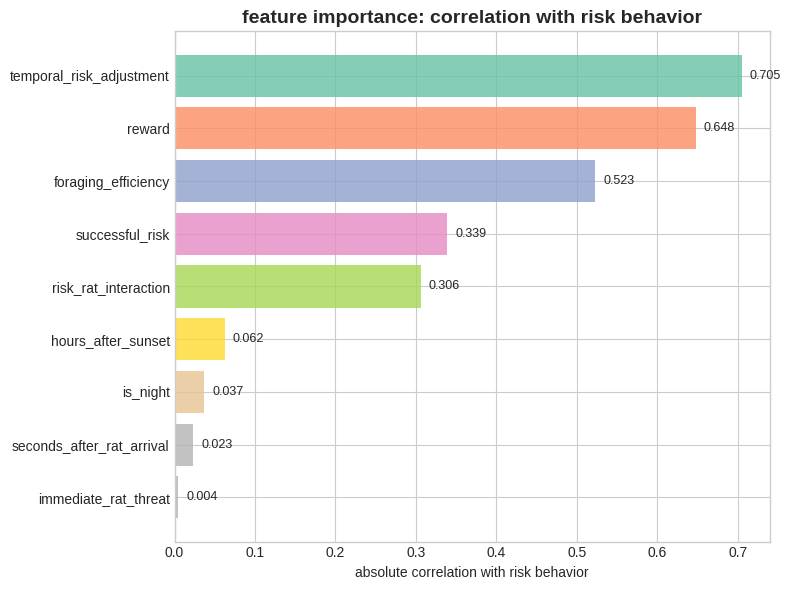


--- interaction features analysis ---


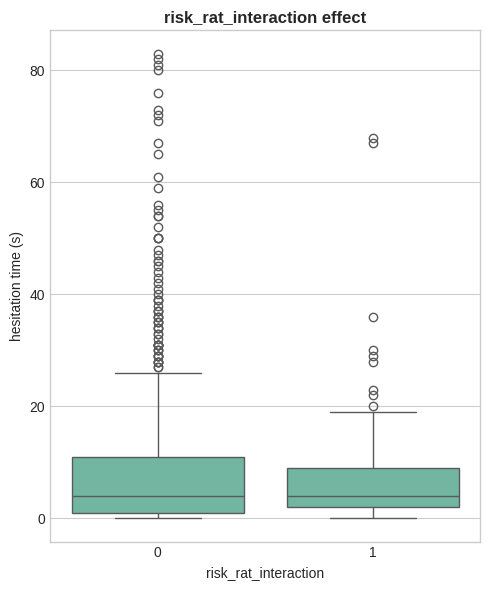


--- feature engineering summary ---
total features created: 10
features cover: time patterns, rat threat levels, risk-reward tradeoffs, and interactions
visualization helps validate feature usefulness and identify relationships


In [23]:
print('\n--- feature engineering visualization ---')


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")



fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('distribution of engineered features', fontsize=16, fontweight='bold')

features_to_plot = existing_features[:12]

for i, feature in enumerate(features_to_plot):
    if i < 12:
        row, col = i // 4, i % 4
        if df1[feature].dtype in ['int64', 'float64']:
            if df1[feature].nunique() > 10:
                sns.histplot(data=df1, x=feature, ax=axes[row, col], kde=True, alpha=0.7)
            else:
                sns.countplot(data=df1, x=feature, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} distribution', fontweight='bold')
        axes[row, col].tick_params(axis='x', rotation=45)

for i in range(len(features_to_plot), 12):
    row, col = i // 4, i % 4
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

# comprehensive correlation analysis
print('\n--- comprehensive correlation analysis ---')

# check key correlations between all features
key_relationships = [
    ('seconds_after_rat_arrival', 'immediate_rat_threat'),
    ('seconds_after_rat_arrival', 'recent_rat_encounter'),
    ('risk', 'successful_risk'),
    ('risk', 'risk_rat_interaction'),
    ('is_night', 'night_risk_interaction'),
    ('immediate_rat_threat', 'risk_rat_interaction')
]

print("key correlation patterns:")
for feat1, feat2 in key_relationships:
    if feat1 in existing_features and feat2 in existing_features:
        corr_value = df1[feat1].corr(df1[feat2])
        print(f"{feat1} vs {feat2}: {corr_value:.2f}")

        # interpret correlation significance
        if abs(corr_value) > 0.6:
            if corr_value > 0:
                print(f"  → strong positive correlation")
            else:
                print(f"  → strong negative correlation")
        elif abs(corr_value) > 0.3:
            print(f"  → moderate correlation")
        else:
            print(f"  → weak correlation")

# special check for time-related features
if 'seconds_after_rat_arrival' in existing_features and 'recent_rat_encounter' in existing_features:
    time_corr = df1['seconds_after_rat_arrival'].corr(df1['recent_rat_encounter'])
    print(f"\ntime logic verification:")
    print(f"seconds_after_rat_arrival vs recent_rat_encounter: {time_corr:.2f}")
    if time_corr < -0.5:
        print("✓ strong negative correlation verified")
    else:
        print("? unexpected time relationship")

# create comprehensive heatmap analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df1[existing_features].corr(), annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', cbar_kws={"shrink": .8})
plt.title('comprehensive correlation analysis of all features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


print('\n--- feature importance analysis ---')

#
if 'risk' in df1.columns:
    feature_importance = []
    for feature in existing_features:
        if feature != 'risk':
            if df1[feature].dtype in ['int64', 'float64']:
                corr = df1[feature].corr(df1['risk'])
                feature_importance.append((feature, abs(corr)))


    feature_importance.sort(key=lambda x: x[1], reverse=True)
    features_sorted, importance_sorted = zip(*feature_importance)

    plt.figure(figsize=(8, 6))
    y_pos = np.arange(len(features_sorted))
    colors = plt.cm.Set2(np.linspace(0, 1, len(features_sorted)))

    bars = plt.barh(y_pos, importance_sorted, color=colors, alpha=0.8)
    plt.yticks(y_pos, features_sorted)
    plt.xlabel('absolute correlation with risk behavior')
    plt.title('feature importance: correlation with risk behavior', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

print('\n--- interaction features analysis ---')

interaction_features = [f for f in existing_features if 'interaction' in f]
if interaction_features:
    fig, axes = plt.subplots(1, len(interaction_features), figsize=(5*len(interaction_features), 6))
    if len(interaction_features) == 1:
        axes = [axes]

    for i, feature in enumerate(interaction_features):

        if df1[feature].nunique() <= 5:
            sns.boxplot(data=df1, x=feature, y='bat_landing_to_food', ax=axes[i])
            axes[i].set_title(f'{feature} effect', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('hesitation time (s)')

    plt.tight_layout()
    plt.show()

print('\n--- feature engineering summary ---')
print(f'total features created: {len(existing_features)}')
print('features cover: time patterns, rat threat levels, risk-reward tradeoffs, and interactions')
print('visualization helps validate feature usefulness and identify relationships')


---4 data transformation for better modeling ---


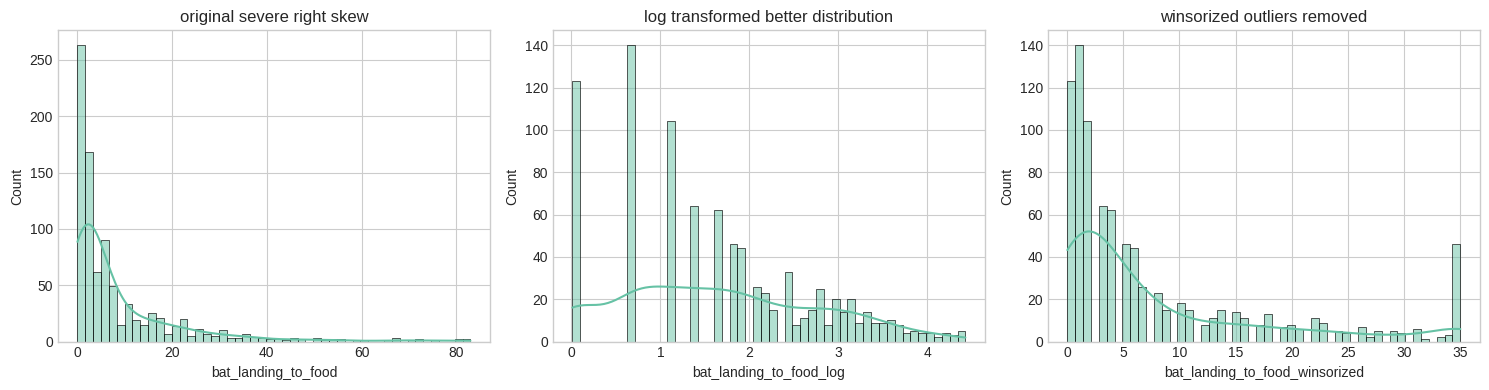

                           na_ratio  is_constant
hours_after_sunset              0.0        False
is_night                        0.0        False
seconds_after_rat_arrival       0.0        False
immediate_rat_threat            0.0        False
risk                            0.0        False
reward                          0.0        False
successful_risk                 0.0        False
foraging_efficiency             0.0        False
risk_rat_interaction            0.0        False
temporal_risk_adjustment        0.0        False

R² with log target: 0.411

R² with winsorized target: 0.282

--- data transformation summary ---

The bat_landing_to_food data is very skewed, with a few extreme high values.
Log transformation reduces skew and makes the distribution more normal, which helps linear models perform better.
Winsorization caps extreme outliers, reducing their impact on mean and variance.
After transformations, log-transformed target has lower std and more symmetric distributio

In [24]:
# 4. data transformation for better modeling
print('\n---4 data transformation for better modeling ---')

# option 1: log transformation to reduce skew
df1['bat_landing_to_food_log'] = np.log1p(df1['bat_landing_to_food'])

# option 2: winsorization to handle outliers
def winsorize_data(series, limits=[0.05, 0.05]):
    lower = series.quantile(limits[0])
    upper = series.quantile(1 - limits[1])
    return np.clip(series, lower, upper)

df1['bat_landing_to_food_winsorized'] = winsorize_data(df1['bat_landing_to_food'])

# visualize transformation effect
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df1['bat_landing_to_food'], bins=50, kde=True)
plt.title('original severe right skew')

plt.subplot(1, 3, 2)
sns.histplot(df1['bat_landing_to_food_log'], bins=50, kde=True)
plt.title('log transformed better distribution')

plt.subplot(1, 3, 3)
sns.histplot(df1['bat_landing_to_food_winsorized'], bins=50, kde=True)
plt.title('winsorized outliers removed')

plt.tight_layout()
plt.show()

# check features for missing values and constants
feature_summary = pd.DataFrame(index=existing_features)
feature_summary['na_ratio'] = df1[existing_features].isna().mean()
feature_summary['is_constant'] = df1[existing_features].nunique() <= 1
print(feature_summary)

# fill missing values for features
df1[existing_features] = df1[existing_features].fillna(df1[existing_features].median())
features_clean = existing_features

# --- testing transformations: log vs winsorized ---
X = df1[features_clean]
targets = {
    'log': df1['bat_landing_to_food_log'],
    'winsorized': df1['bat_landing_to_food_winsorized']
}

for name, y in targets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)
    print(f"\nR² with {name} target: {r2:.3f}")


print("\n--- data transformation summary ---")
print("""
The bat_landing_to_food data is very skewed, with a few extreme high values.
Log transformation reduces skew and makes the distribution more normal, which helps linear models perform better.
Winsorization caps extreme outliers, reducing their impact on mean and variance.
After transformations, log-transformed target has lower std and more symmetric distribution, winsorized has fewer extreme values but still right-skewed.
Features were checked for missing values and constants; most are fine.
Comparing R² for log vs winsorized target helps to see which transformation improves linear model performance more.
""")



--- 5 simple linear regression (week8) ---
winter samples: 150
spring samples: 741
seasonal datasets ready for analysis.

--- winter season analysis ---
intercept: 1.3310767403433055
coefficients: {'hours_after_sunset': np.float64(0.04334645667195187), 'is_night': np.float64(-2.0816681711721685e-16), 'seconds_after_rat_arrival': np.float64(-0.08025837522208198), 'immediate_rat_threat': np.float64(0.003927339078340177), 'risk': np.float64(-0.11658924090500893), 'reward': np.float64(0.5304000554822897), 'successful_risk': np.float64(0.07981199306189526), 'foraging_efficiency': np.float64(-0.6681592796768694), 'risk_rat_interaction': np.float64(-0.025728048813129744), 'temporal_risk_adjustment': np.float64(0.21716425121271865)}
mae: 0.5333049438809596
mse: 0.5709702317328529
rmse: 0.755625721989963
nrmse: 0.21869884474696155
r2: 0.2909810638837802

--- spring season analysis ---
intercept: 1.7468133369478598
coefficients: {'hours_after_sunset': np.float64(-0.023913133406644582), 'is_nigh

/tmp/ipython-input-3516112118.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature', y='change', data=top5_df, palette='viridis')


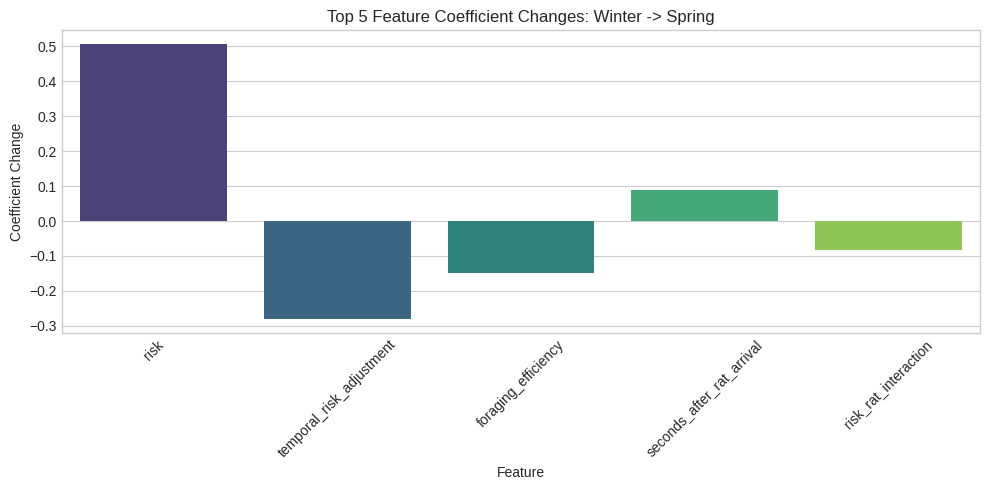


--- season statistics summary ---
   season        r2       mae      mse      rmse  rmse_norm  pearson_r  \
0  winter  0.290981  0.533305  0.57097  0.755626   0.218699   0.011003   
1  spring  0.467261  0.586697  0.63026  0.793889   0.179587   0.039984   

   pearson_p  t_test_t      t_test_p   chi2         chi2_p  risk_proportion  
0   0.893689 -1.413407  1.596988e-01  140.0   7.205428e-22         0.566667  
1   0.277030 -9.846997  1.850451e-21  711.0  7.753647e-108         0.476383  


/tmp/ipython-input-3516112118.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='r2', data=season_stats_df, palette='Blues_d')


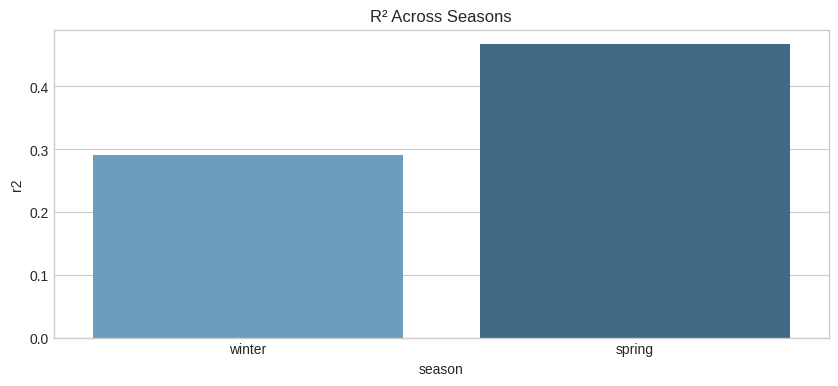

/tmp/ipython-input-3516112118.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='mae', data=season_stats_df, palette='Oranges_d')


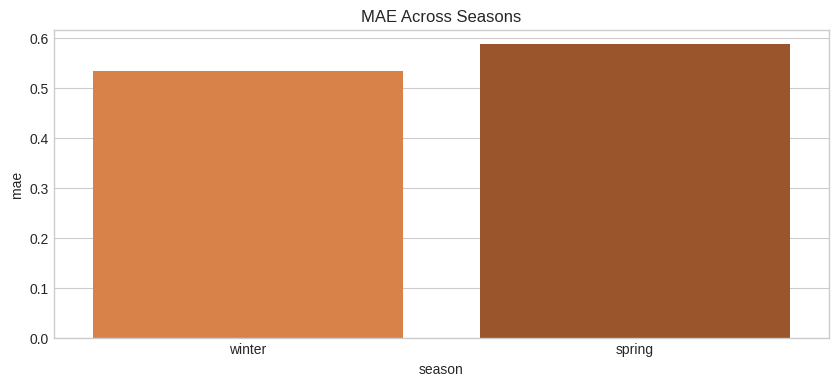

In [32]:
print('\n--- 5 simple linear regression (week8) ---')

season_mapping = {0: 'winter', 1: 'spring'}
df1['season_name'] = df1['season'].map(season_mapping)

df_winter = df1[df1['season_name'] == 'winter']
df_spring = df1[df1['season_name'] == 'spring']

seasonal_datasets = []
if len(df_winter) > 0:
    seasonal_datasets.append(('winter', df_winter))
if len(df_spring) > 0:
    seasonal_datasets.append(('spring', df_spring))

print(f'winter samples: {len(df_winter)}')
print(f'spring samples: {len(df_spring)}')
print('seasonal datasets ready for analysis.')

# --- define target and features ---
target = 'bat_landing_to_food_log'
features_clean = [f for f in existing_features if f in df1.columns]

# --- train linear models for each season ---
season_models = {}
season_splits = {}
season_metrics = {}

for season_name, df_season in seasonal_datasets:
    if df_season.empty:
        continue

    x_season = df_season[features_clean].fillna(df_season[features_clean].median())
    y_season = df_season[target].fillna(df_season[target].median())

    if x_season.shape[1] == 0:
        continue

    print(f'\n--- {season_name} season analysis ---')
    x_train, x_test, y_train, y_test = train_test_split(
        x_season, y_season, test_size=0.3, random_state=42
    )

    # scale features
    scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
    x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

    # train model
    model_season = LinearRegression()
    model_season.fit(x_train_scaled, y_train)
    y_pred_season = model_season.predict(x_test_scaled)

    # metrics
    mae = metrics.mean_absolute_error(y_test, y_pred_season)
    mse = metrics.mean_squared_error(y_test, y_pred_season)
    rmse = math.sqrt(mse)
    rmse_norm = rmse / (y_test.max() - y_test.min())
    r2 = metrics.r2_score(y_test, y_pred_season)

    print('intercept:', model_season.intercept_)
    print('coefficients:', dict(zip(features_clean, model_season.coef_)))
    print('mae:', mae)
    print('mse:', mse)
    print('rmse:', rmse)
    print('nrmse:', rmse_norm)
    print('r2:', r2)

    season_models[season_name] = model_season
    season_splits[season_name] = (x_train_scaled, x_test_scaled, y_train, y_test)
    season_metrics[season_name] = {'mae': mae, 'mse': mse, 'rmse': rmse, 'nrmse': rmse_norm, 'r2': r2}

# --- baseline models ---
for season_name, (x_train_scaled, x_test_scaled, y_train, y_test) in season_splits.items():
    y_base = np.mean(y_train)
    y_pred_base = [y_base] * len(y_test)

    mae_base = metrics.mean_absolute_error(y_test, y_pred_base)
    mse_base = metrics.mean_squared_error(y_test, y_pred_base)
    rmse_base = math.sqrt(mse_base)
    rmse_norm_base = rmse_base / (y_test.max() - y_test.min())
    r2_base = metrics.r2_score(y_test, y_pred_base)

    print(f'\n--- baseline {season_name} ---')
    print('mae_base:', mae_base)
    print('mse_base:', mse_base)
    print('rmse_base:', rmse_base)
    print('nrmse_base:', rmse_norm_base)
    print('r2_base:', r2_base)

# --- stats tests ---
print('\n-------- correlation and t-test -------')

stats_results = {}

for season_name, df_season in seasonal_datasets:
    if df_season.empty:
        continue

    df_season = df_season.dropna(subset=['seconds_after_rat_arrival', target, 'risk'])
    r, p = pearsonr(df_season['seconds_after_rat_arrival'], df_season[target])
    t_stat, t_p = ttest_ind(
        df_season[df_season['risk'] == 0][target],
        df_season[df_season['risk'] == 1][target],
        equal_var=False
    )
    cont = pd.crosstab(df_season['habit'], df_season['risk'])
    chi2, chi2_p, dof, ex = chi2_contingency(cont)

    stats_results[season_name] = {
        'r': r, 'r_p': p,
        't': t_stat, 't_p': t_p,
        'chi2': chi2, 'chi2_p': chi2_p,
        'risk_mean': df_season['risk'].mean(),
        'samples': len(df_season)
    }

    print(f'\n{season_name} stats:')
    print(f'pearson r={r:.3f}, p={p:.5f}')
    print(f't-test t={t_stat:.3f}, p={t_p:.5f}')
    print(f'chi2={chi2:.3f}, p={chi2_p:.5f}')
    print(f'risk proportion: {df_season["risk"].mean():.1%}')
    print(f'samples: {len(df_season)}')

# --- feature changes between seasons ---
print('\n--- feature changes between seasons ---')

if 'winter' in season_models and 'spring' in season_models:
    model_w = season_models['winter']
    model_s = season_models['spring']

    feature_changes = []
    for i, feat in enumerate(features_clean):
        w_coef = model_w.coef_[i]
        s_coef = model_s.coef_[i]
        change = s_coef - w_coef
        feature_changes.append({
            'feature': feat.lower(),
            'winter_coeff': w_coef,
            'spring_coeff': s_coef,
            'change': change
        })

    feature_changes.sort(key=lambda x: abs(x['change']), reverse=True)

    print('top 5 changing features:')
    for i, ch in enumerate(feature_changes[:5]):
        print(f"{i+1}. {ch['feature']}: winter {ch['winter_coeff']:.3f} -> spring {ch['spring_coeff']:.3f}, change {ch['change']:.3f}")

    top5_df = pd.DataFrame(feature_changes[:5])
    print('\n--- top 5 changing features dataframe ---')
    print(top5_df)

    # --- visualize top feature changes ---
    plt.figure(figsize=(10, 5))
    sns.barplot(x='feature', y='change', data=top5_df, palette='viridis')
    plt.title('Top 5 Feature Coefficient Changes: Winter -> Spring')
    plt.ylabel('Coefficient Change')
    plt.xlabel('Feature')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- season statistics summary ---
season_stats_df = pd.DataFrame({
    'season': list(season_splits.keys()),
    'r2': [season_metrics[s]['r2'] for s in season_splits],
    'mae': [season_metrics[s]['mae'] for s in season_splits],
    'mse': [season_metrics[s]['mse'] for s in season_splits],
    'rmse': [season_metrics[s]['rmse'] for s in season_splits],
    'rmse_norm': [season_metrics[s]['nrmse'] for s in season_splits],
    'pearson_r': [stats_results[s]['r'] for s in season_splits],
    'pearson_p': [stats_results[s]['r_p'] for s in season_splits],
    't_test_t': [stats_results[s]['t'] for s in season_splits],
    't_test_p': [stats_results[s]['t_p'] for s in season_splits],
    'chi2': [stats_results[s]['chi2'] for s in season_splits],
    'chi2_p': [stats_results[s]['chi2_p'] for s in season_splits],
    'risk_proportion': [stats_results[s]['risk_mean'] for s in season_splits]
})

print('\n--- season statistics summary ---')
print(season_stats_df)

# --- visualize R² and MAE across seasons ---
plt.figure(figsize=(10,4))
sns.barplot(x='season', y='r2', data=season_stats_df, palette='Blues_d')
plt.title('R² Across Seasons')
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x='season', y='mae', data=season_stats_df, palette='Oranges_d')
plt.title('MAE Across Seasons')
plt.show()


--- 6 multiple linear regression with ols(week9) ---
Correlation matrix:
                           hours_after_sunset  is_night  \
hours_after_sunset                   1.000000  0.276388   
is_night                             0.276388  1.000000   
seconds_after_rat_arrival            0.073439 -0.081458   
immediate_rat_threat                -0.089248  0.001220   
risk                                -0.062479  0.036985   
reward                               0.048030 -0.031537   
successful_risk                     -0.046246 -0.026021   
foraging_efficiency                  0.024812 -0.077568   
risk_rat_interaction                -0.087211  0.035164   
temporal_risk_adjustment            -0.417782 -0.236787   
bat_landing_to_food_log              0.007758  0.075643   

                           seconds_after_rat_arrival  immediate_rat_threat  \
hours_after_sunset                          0.073439             -0.089248   
is_night                                   -0.081458         

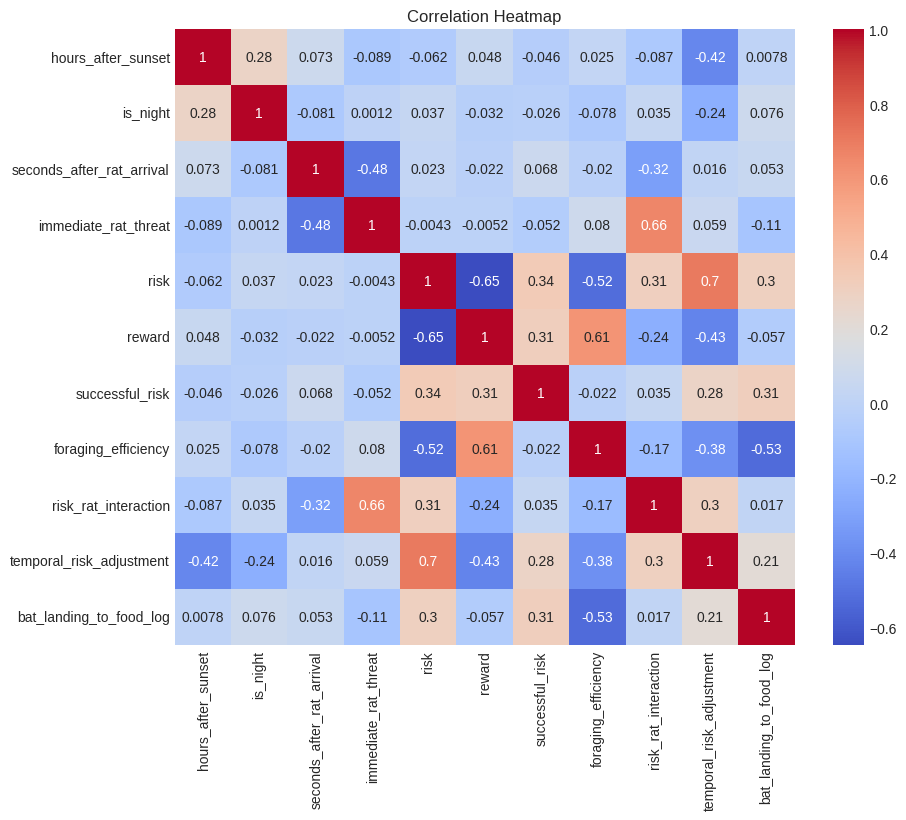


 Multiple Regression Summary
                               OLS Regression Results                              
Dep. Variable:     bat_landing_to_food_log   R-squared:                       0.447
Model:                                 OLS   Adj. R-squared:                  0.441
Method:                      Least Squares   F-statistic:                     71.10
Date:                     Wed, 15 Oct 2025   Prob (F-statistic):          4.38e-106
Time:                             10:39:46   Log-Likelihood:                -1087.0
No. Observations:                      891   AIC:                             2196.
Df Residuals:                          880   BIC:                             2249.
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

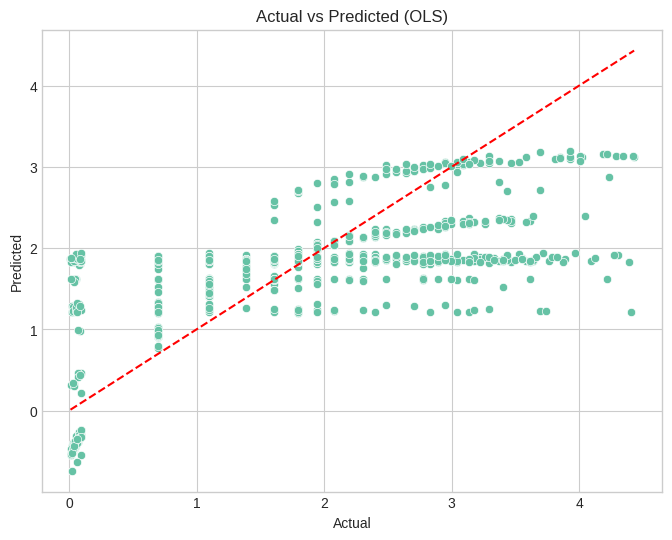

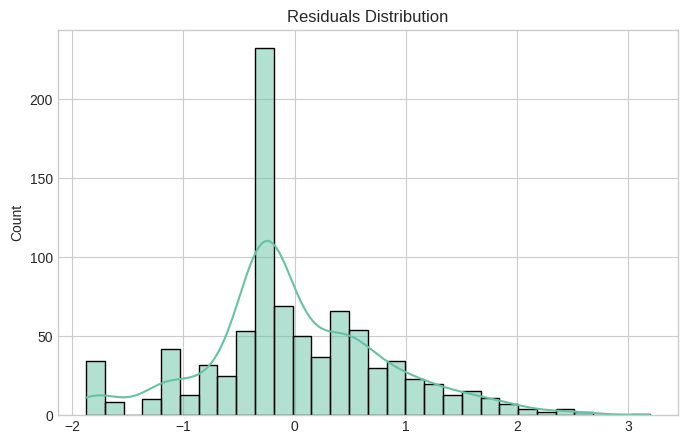


--- 6.1 Power Transformation (Yeo-Johnson) ---
                               OLS Regression Results                              
Dep. Variable:     bat_landing_to_food_log   R-squared:                       0.523
Model:                                 OLS   Adj. R-squared:                  0.517
Method:                      Least Squares   F-statistic:                     96.37
Date:                     Wed, 15 Oct 2025   Prob (F-statistic):          5.64e-134
Time:                             10:39:46   Log-Likelihood:                -1021.4
No. Observations:                      891   AIC:                             2065.
Df Residuals:                          880   BIC:                             2117.
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

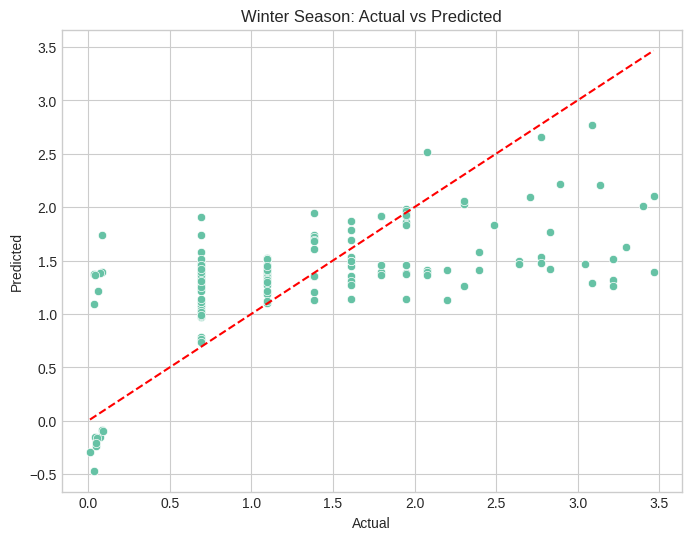

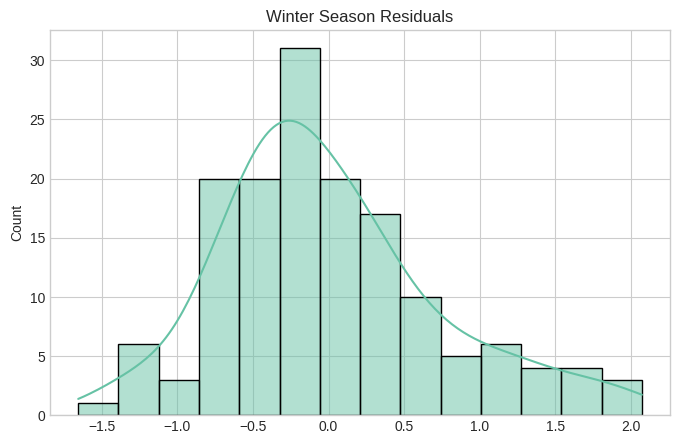


--- spring season OLS ---
                               OLS Regression Results                              
Dep. Variable:     bat_landing_to_food_log   R-squared:                       0.475
Model:                                 OLS   Adj. R-squared:                  0.467
Method:                      Least Squares   F-statistic:                     65.96
Date:                     Wed, 15 Oct 2025   Prob (F-statistic):           3.52e-95
Time:                             10:39:47   Log-Likelihood:                -902.95
No. Observations:                      741   AIC:                             1828.
Df Residuals:                          730   BIC:                             1879.
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

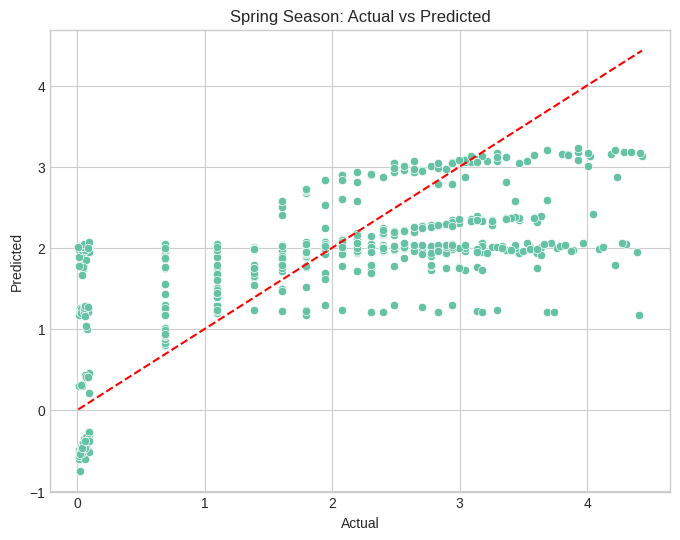

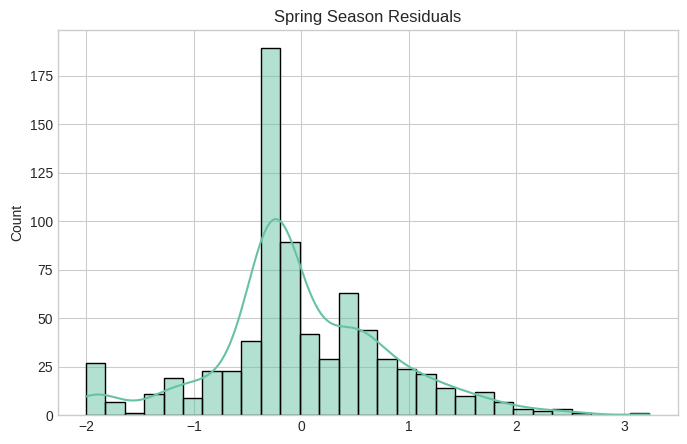

In [30]:
print('\n--- 6 multiple linear regression with ols(week9) ---')

# --- define target and features ---
target = 'bat_landing_to_food_log'
features_clean = [f for f in features if f in df1.columns]

X_multiple = df1[features_clean]
y_multiple = df1[target]

# --- correlation matrix ---
corr_matrix = df1[features_clean + [target]].corr()
print("Correlation matrix:")
print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# --- OLS regression ---
X_multiple_const = sm.add_constant(X_multiple)
model_ols = sm.OLS(y_multiple, X_multiple_const).fit()
print('\n Multiple Regression Summary')
print(model_ols.summary())

# --- predict and compare ---
y_pred_ols = model_ols.predict(X_multiple_const)
df_pred = pd.DataFrame({'Actual': y_multiple, 'Predicted': y_pred_ols})
print(df_pred.head())

# --- scatter plot: actual vs predicted ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=df_pred)
plt.plot([df_pred.Actual.min(), df_pred.Actual.max()],
         [df_pred.Actual.min(), df_pred.Actual.max()],
         color='red', linestyle='--')
plt.title("Actual vs Predicted (OLS)")
plt.show()

# --- residuals distribution ---
residuals = y_multiple - y_pred_ols
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# --- Power Transformation (Yeo-Johnson) ---
print('\n--- 6.1 Power Transformation (Yeo-Johnson) ---')
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X_multiple)

X_transformed_const = sm.add_constant(X_transformed)
model_transformed = sm.OLS(y_multiple, X_transformed_const).fit()
print(model_transformed.summary())

# --- seasonal OLS models ---
print('\n--- 6.2 Seasonal OLS Models ---')

season_models = {}
season_splits = {}
season_metrics = {}

season_mapping = {0: 'winter', 1: 'spring'}
df1['season_name'] = df1['season'].map(season_mapping)

for season_name in ['winter', 'spring']:
    df_season = df1[df1['season_name'] == season_name]
    if df_season.empty:
        continue

    X_season = df_season[features_clean].fillna(df_season[features_clean].median())
    y_season = df_season[target].fillna(df_season[target].median())

    X_season_const = sm.add_constant(X_season)
    model_season = sm.OLS(y_season, X_season_const).fit()
    y_pred_season = model_season.predict(X_season_const)

    mae = metrics.mean_absolute_error(y_season, y_pred_season)
    mse = metrics.mean_squared_error(y_season, y_pred_season)
    rmse = math.sqrt(mse)
    nrmse = rmse / (y_season.max() - y_season.min())
    r2 = metrics.r2_score(y_season, y_pred_season)

    print(f'\n--- {season_name} season OLS ---')
    print(model_season.summary())
    print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}')

    season_models[season_name] = model_season
    season_splits[season_name] = (X_season, y_season, y_pred_season)
    season_metrics[season_name] = {'mae': mae, 'mse': mse, 'rmse': rmse, 'nrmse': nrmse, 'r2': r2}

    # --- visualize predicted vs actual ---
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_season, y=y_pred_season)
    plt.plot([y_season.min(), y_season.max()],
             [y_season.min(), y_season.max()],
             color='red', linestyle='--')
    plt.title(f"{season_name.capitalize()} Season: Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # --- residuals ---
    plt.figure(figsize=(8,5))
    sns.histplot(y_season - y_pred_season, kde=True)
    plt.title(f"{season_name.capitalize()} Season Residuals")
    plt.show()




/tmp/ipython-input-1523121520.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Season', y='R2', palette=[colors['Winter'], colors['Spring']], dodge=False)


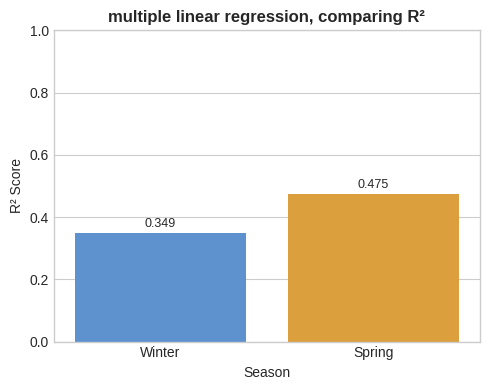

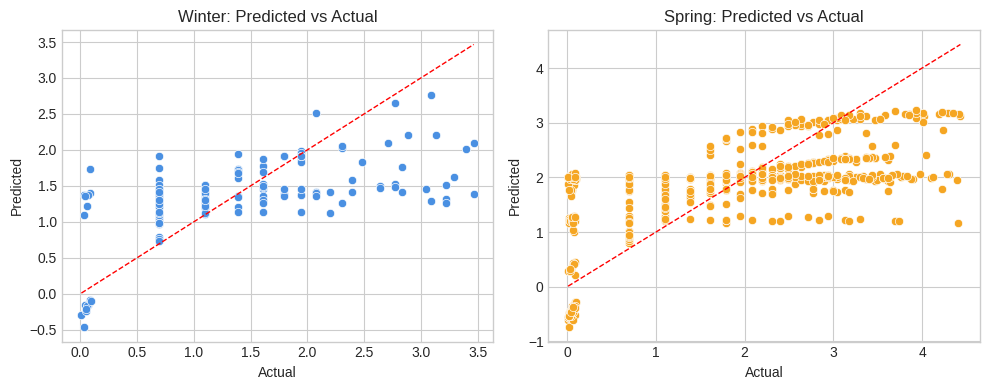

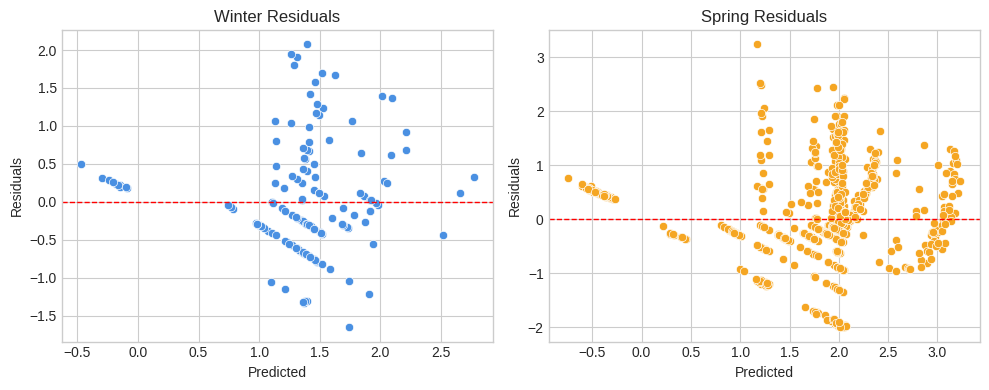

In [29]:


colors = {'Winter':'#4A90E2', 'Spring':'#F5A623'}


# --- R² Comparison ---
metrics_df = pd.DataFrame({
    'Season': ['Winter', 'Spring'],
    'R2': [season_metrics['winter']['r2'], season_metrics['spring']['r2']]
})
plt.figure(figsize=(5,4))
sns.barplot(data=metrics_df, x='Season', y='R2', palette=[colors['Winter'], colors['Spring']], dodge=False)
for i, v in enumerate(metrics_df['R2']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=9)
plt.title('multiple linear regression, comparing R²', fontsize=12, fontweight='bold')
plt.ylabel('R² Score')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# --- Predicted vs Actual & Residuals ---
X_w, y_w, y_pred_w = season_splits['winter']
X_s, y_s, y_pred_s = season_splits['spring']

# Predicted vs Actual
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.scatterplot(x=y_w, y=y_pred_w, color=colors['Winter'], ax=axes[0])
axes[0].plot([y_w.min(), y_w.max()], [y_w.min(), y_w.max()], 'r--', linewidth=1)
axes[0].set_title('Winter: Predicted vs Actual')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

sns.scatterplot(x=y_s, y=y_pred_s, color=colors['Spring'], ax=axes[1])
axes[1].plot([y_s.min(), y_s.max()], [y_s.min(), y_s.max()], 'r--', linewidth=1)
axes[1].set_title('Spring: Predicted vs Actual')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
plt.tight_layout()
plt.show()

# Residuals
residuals_w = y_w - y_pred_w
residuals_s = y_s - y_pred_s

fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.scatterplot(x=y_pred_w, y=residuals_w, color=colors['Winter'], ax=axes[0])
axes[0].axhline(0, linestyle='--', color='red', linewidth=1)
axes[0].set_title('Winter Residuals')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Residuals')

sns.scatterplot(x=y_pred_s, y=residuals_s, color=colors['Spring'], ax=axes[1])
axes[1].axhline(0, linestyle='--', color='red', linewidth=1)
axes[1].set_title('Spring Residuals')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()
